### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [82]:
os.makedirs('images', exist_ok=True)
os.makedirs('images/other', exist_ok=True)
os.makedirs('images/coupons/bar', exist_ok=True)
os.makedirs('images/coupons/coffee_house', exist_ok=True)
os.makedirs('images/coupons/carry_away', exist_ok=True)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [84]:
data = pd.read_csv('data/coupons.csv')

In [85]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

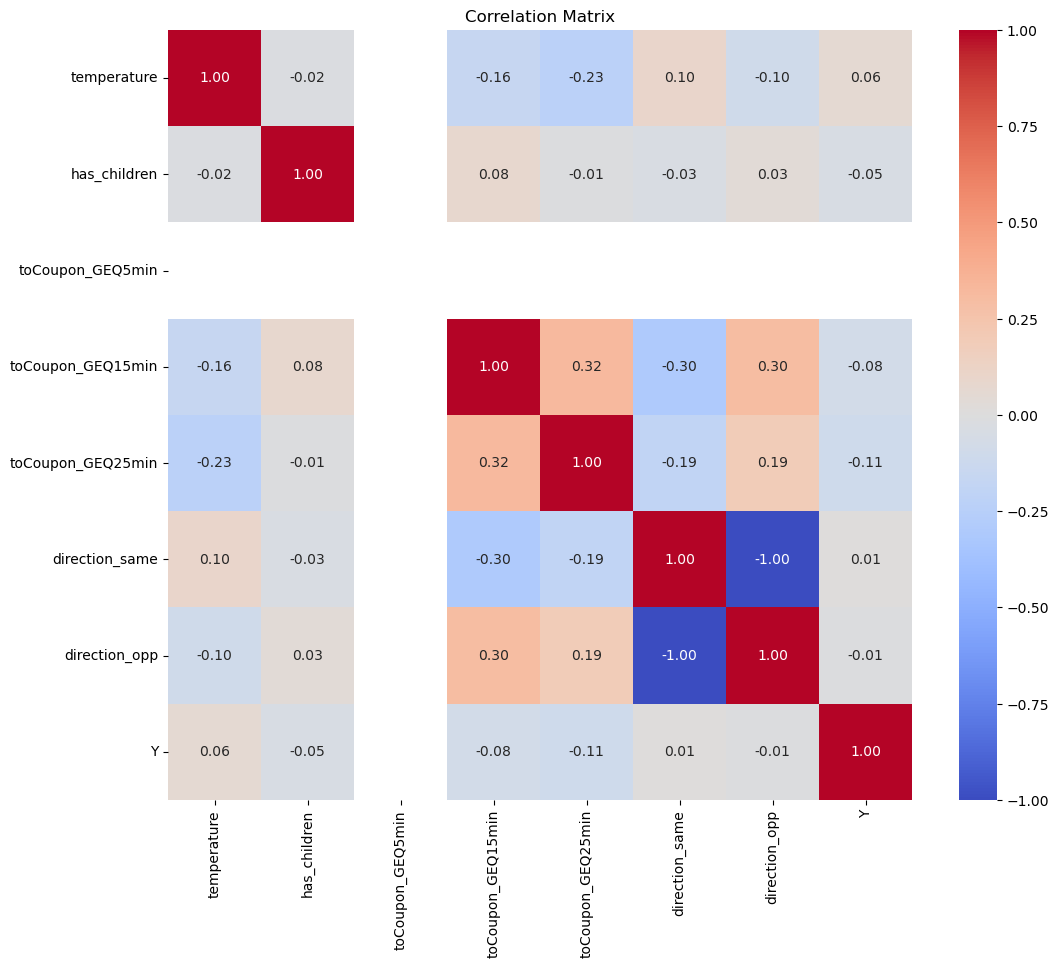

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   destination            12610 non-null  object
 1   passenger              12610 non-null  object
 2   weather                12610 non-null  object
 3   temperature            12610 non-null  int64 
 4   time                   12610 non-null  object
 5   coupon                 12610 non-null  object
 6   expiration             12610 non-null  object
 7   gender                 12610 non-null  object
 8   age                    12610 non-null  int64 
 9   marital_status         12610 non-null  object
 10  has_children           12610 non-null  int64 
 11  education              12610 non-null  object
 12  occupation             12610 non-null  object
 13  income                 12610 non-null  object
 14  car                    108 non-null    object
 15  bar                    1

<Figure size 640x480 with 0 Axes>

In [87]:
data.info()
# Check duplicate data and remove all duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Total Duplicate rows: {duplicate_count}")
# Deleting duplicate rows
data = data.drop_duplicates()

# Check how much data is missing in this dataset.
missing_values = data.isnull().sum()
pct_missing_data = (missing_values / len(data) * 100)
print(f"Percentage missing values: \n{pct_missing_data}")
print(f"Total missing values: \n{missing_values}")

# Check Unique Data, DataTypes and Values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    data_type = data[column].dtype
    print(f"Column '{column}': Data Type - {data_type}")
    print("-" * 20)

# Calculate Correlation Matrix and visualize the relation using HeatMap
numeric_data = data.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
print(f"Correlation Matrix: \n{corr_matrix}")
higher_corr = corr_matrix[corr_matrix > 0.5]
print(f"Higher Correlation Matrix: \n{higher_corr}")
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
plt.savefig('images/other/correlation_matrix.png')

# Copy DataFrame
data_modified_df = data.copy()

# Rename Columns for better analysis,correct spellings and consistent name
data_modified_df.rename(columns = {
    'passanger': 'passenger',
    'Bar': 'bar',
    'maritalStatus': 'marital_status',
    'toCoupon_GEQ5min': 'is_travel_time_5min',
    'toCoupon_GEQ15min': 'is_travel_time_15min',
    'toCoupon_GEQ25min': 'is_travel_time_25min',
    'RestaurantLessThan20': 'restaurant_under_20',
    'Restaurant20To50': 'restaurant_20_to_50',
    'direction_same': 'is_same_direction',
    'direction_opp': 'is_opposite_direction',
    'CarryAway': 'carry_away',
    'CoffeeHouse': 'coffee_house',
    'Y': 'has_coupon_accepted'
}, inplace=True)

# Modify values to int64
data_modified_df['age'] = data_modified_df['age'].replace({'below21':20})
data_modified_df['age'] = data_modified_df['age'].replace({'50plus':51}).astype('int64')

data_modified_df.info()


3. Decide what to do about your missing data -- drop, replace, other...

**Decision on Missing Data**

Columns **bar, coffee_house, carry_away, restaurant_under_20, restaurent_20_to_50** have missing values under **2%**. Imputing values based on mean value

Dropping **Car** column as missing value is over **99%**. It has no impact.


In [91]:
# Imputing missing values of Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 based on mean value

columns_to_impute = ['bar', 'coffee_house', 'carry_away', 'restaurant_under_20', 'restaurant_20_to_50']

# Calculate the mode of the column
for column in columns_to_impute:
    mode_value = data_modified_df[column].mode()[0]
    data_modified_df[column] = data_modified_df[column].fillna(mode_value)
    print(f"Mod value of {column}: {mode_value}")

#Since the column car has missing values in 99%, dropping the car column.
data_modified_df.drop('car', axis=1, inplace=True)


Mod value of bar: never
Mod value of coffee_house: less1
Mod value of carry_away: 1~3
Mod value of restaurant_under_20: 1~3
Mod value of restaurant_20_to_50: less1


4. What proportion of the total observations chose to accept the coupon?



--------------------------------------------------------------------------------

Coupon Acceptance Proportion Distribution


*  Proportion of the total coupons accepted: 57.00%

*  Proportion of the total coupons rejected: 43.00%

--------------------------------------------------------------------------------


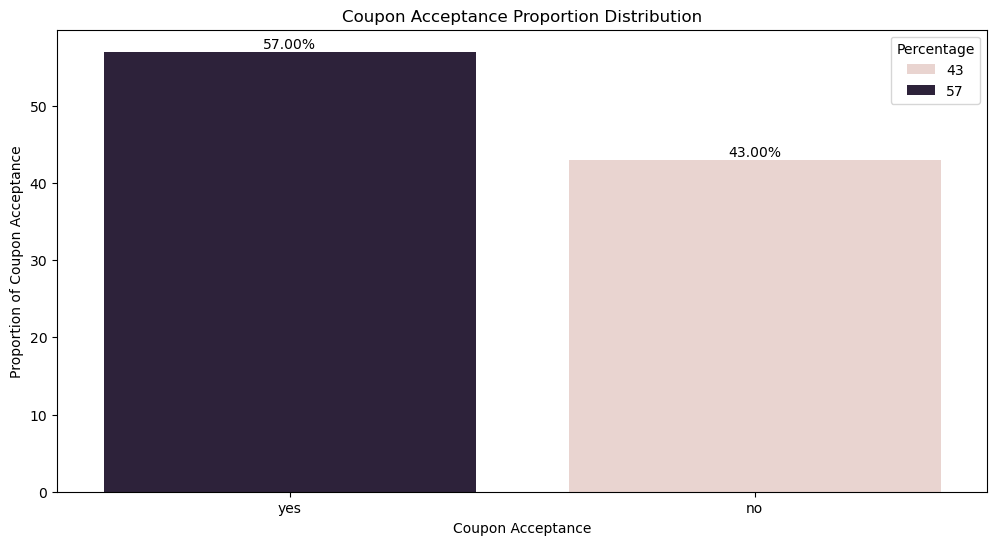

In [93]:
# Taking mean of column 'has_coupons_accepted' where participants accepted coupons
total_accepted_coupons = data_modified_df['has_coupon_accepted'].mean().round(2)
total_rejected_coupons = 1 - total_accepted_coupons
proportion_coupons_accepted = (total_accepted_coupons * 100).round(2)
proportion_coupons_rejected = (total_rejected_coupons * 100).round(2)

print("-" * 80)
print("\n\033[1mCoupon Acceptance Proportion Distribution\n\033[0m")
print(f"\n\033[1m*  Proportion of the total coupons accepted: {proportion_coupons_accepted:.2f}%\n\033[0m")

print(f"\033[1m*  Proportion of the total coupons rejected: {proportion_coupons_rejected:.2f}%\n\033[0m")
print("-" * 80)

# Draw BarPlot to visualize coupons acceptance ratio
coupon_acceptance_count_df = data_modified_df['has_coupon_accepted'].value_counts(normalize=True).round(2).reset_index()
coupon_acceptance_count_df.columns = ['has_coupon_accepted', 'Percentage']
coupon_acceptance_count_df['Percentage'] = (coupon_acceptance_count_df['Percentage'] * 100).round(0).astype(int)

coupon_acceptance_count_df['has_coupon_accepted'] = coupon_acceptance_count_df['has_coupon_accepted'].replace({1: 'yes', 0: 'no'})

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='has_coupon_accepted', y='Percentage', data=coupon_acceptance_count_df, hue='Percentage')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Proportion of Coupon Acceptance')
plt.title('Coupon Acceptance Proportion Distribution')
for i, row in coupon_acceptance_count_df.iterrows():
    rate = row['Percentage']
    ax.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.savefig('images/coupons/coupon_acceptance_distribution.png')
plt.show()


5. Use a bar plot to visualize the `coupon` column.

                  coupon has_coupon_accepted  count
0                    Bar                  no   1186
1                    Bar                 yes    824
2  Carry out & Take away                  no    624
3  Carry out & Take away                 yes   1720
4           Coffee House                  no   2000
5           Coffee House                 yes   1989
6      Restaurant(20-50)                  no    831
7      Restaurant(20-50)                 yes    657
8        Restaurant(<20)                  no    812
9        Restaurant(<20)                 yes   1967


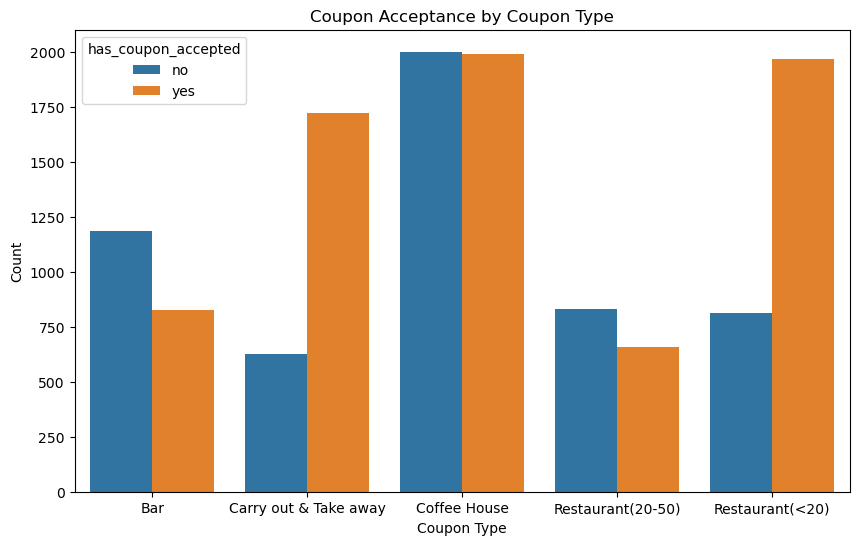

In [95]:
# Select 'coupon' and 'has_coupon_accepted' column using groupby function

coupon_acceptance = data_modified_df.groupby(['coupon', 'has_coupon_accepted'])['has_coupon_accepted'].count().reset_index(name='count')

# Create the bar plot to visualize the 'coupon' column
# with 'has_coupon_accepted' column using seaborn
coupon_acceptance['has_coupon_accepted'] = coupon_acceptance['has_coupon_accepted'].map({0: 'no', 1: 'yes'})
print(coupon_acceptance)

plt.figure(figsize=(10, 6))
sns.barplot(x='coupon', y='count', hue='has_coupon_accepted', data=coupon_acceptance)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Coupon Type')
plt.savefig('images/coupons/coupon_type_distribution.png')
plt.show()

6. Use a histogram to visualize the temperature column.

       temperature  has_coupon_accepted
0               55                    1
1               80                    0
2               80                    1
3               80                    0
4               80                    0
...            ...                  ...
12679           55                    1
12680           55                    1
12681           30                    0
12682           30                    0
12683           80                    0

[12610 rows x 2 columns]


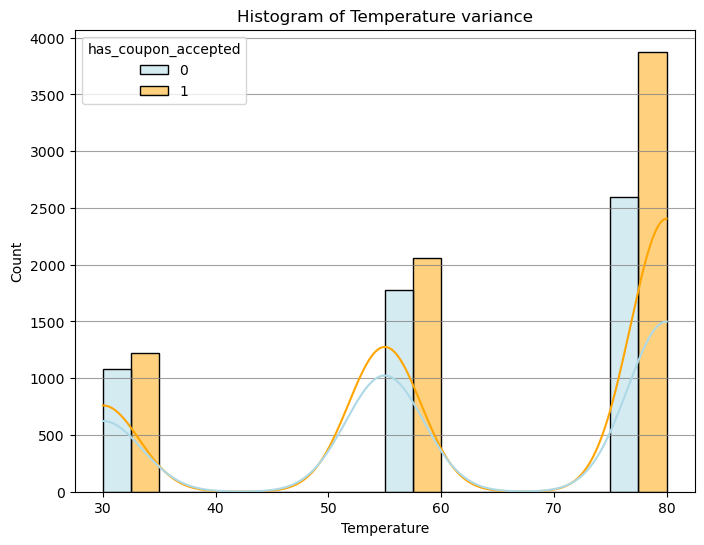

In [97]:
coupon_acceptance = data_modified_df[['temperature', 'has_coupon_accepted']]
print(coupon_acceptance)

# Create the bar plot to visualize the 'coupon' column
# with 'has_coupon_accepted' column using seaborn

plt.figure(figsize=(8, 6))
sns.histplot(coupon_acceptance, x='temperature',  kde=True, bins=10,multiple="dodge", hue='has_coupon_accepted', palette={1: 'orange', 0: 'lightblue'})
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature variance')
plt.grid(axis='y', alpha=0.75, color='grey')
plt.savefig('images/coupons/temperature_coupon_distribution.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [99]:
bar_coupons_df = data_modified_df[data_modified_df['coupon'] == 'Bar']
print(type(bar_coupons_df))
bar_coupons_df.sample(10)

<class 'pandas.core.frame.DataFrame'>


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_under_20,restaurant_20_to_50,is_travel_time_5min,is_travel_time_15min,is_travel_time_25min,is_same_direction,is_opposite_direction,has_coupon_accepted
7734,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
11957,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,51,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
8347,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,26,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
8679,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,26,Single,...,1~3,less1,1~3,less1,1,1,0,0,1,1
6214,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,less1,1~3,1~3,less1,1,0,0,0,1,0
8945,Home,Kid(s),Sunny,30,6PM,Bar,2h,Female,31,Married partner,...,4~8,4~8,less1,less1,1,1,0,0,1,1
12128,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,1~3,4~8,4~8,4~8,1,1,1,0,1,0
3394,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,51,Married partner,...,less1,gt8,gt8,1~3,1,1,0,0,1,0
11780,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,41,Married partner,...,less1,less1,less1,less1,1,0,0,0,1,1
8359,Home,Alone,Sunny,80,6PM,Bar,2h,Male,26,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


--------------------------------------------------------------------------------

Bar Coupon Acceptance Proportion Distribution


*  Proportion of the bar coupons accepted: 41.00%


*  Proportion of the bar coupons rejected: 59.00%

--------------------------------------------------------------------------------


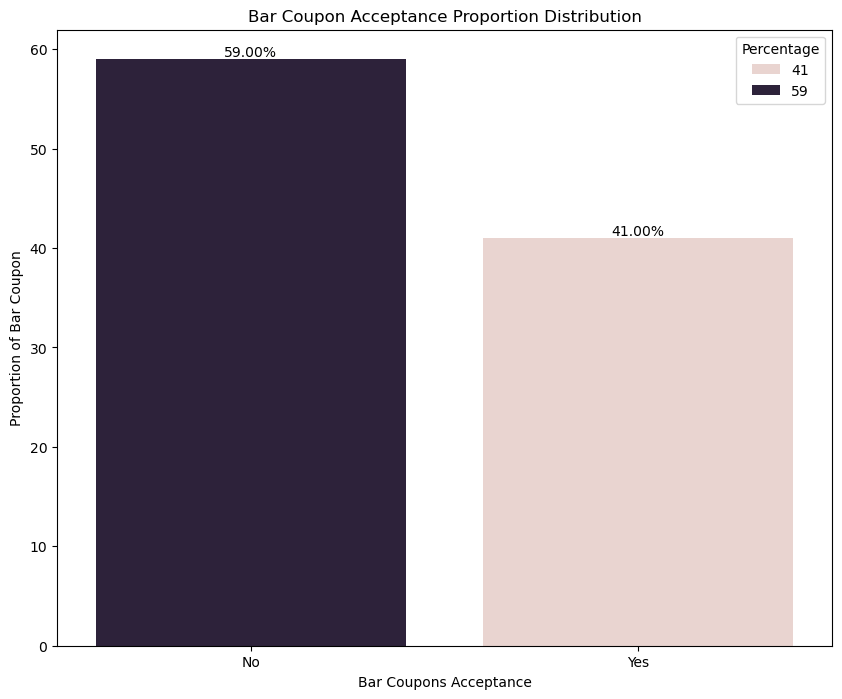

In [101]:
#
bar_coupons_accepted = bar_coupons_df['has_coupon_accepted'].mean().round(2)
bar_coupons_rejected = 1 - bar_coupons_accepted
proportion_bar_coupons_accepted = (bar_coupons_accepted * 100).round(2)
proportion_bar_coupons_rejected = 100 - proportion_bar_coupons_accepted

print("-" * 80)
print("\n\033[1mBar Coupon Acceptance Proportion Distribution\n\033[0m")
print(f"\n\033[1m*  Proportion of the bar coupons accepted: {proportion_bar_coupons_accepted:.2f}%\n\033[0m")
print(f"\n\033[1m*  Proportion of the bar coupons rejected: {proportion_bar_coupons_rejected:.2f}%\n\033[0m")
print("-" * 80)

# Draw BarPlot to visualize coupons acceptance ratio
bar_acceptance_count_df = bar_coupons_df['has_coupon_accepted'].value_counts(normalize=True).round(2).reset_index()
bar_acceptance_count_df.columns = ['has_coupon_accepted', 'Percentage']
bar_acceptance_count_df['Percentage'] = (bar_acceptance_count_df['Percentage'] * 100).round(0).astype(int)
bar_acceptance_count_df['has_coupon_accepted'] = bar_acceptance_count_df['has_coupon_accepted'].replace({1: 'Yes', 0: 'No'})

plt.figure(figsize=(10, 8))
ax=sns.barplot(x='has_coupon_accepted', y='Percentage', data=bar_acceptance_count_df, hue='Percentage')
plt.xlabel('Bar Coupons Acceptance')
plt.ylabel('Proportion of Bar Coupon')
plt.title('Bar Coupon Acceptance Proportion Distribution')
for i, row in bar_acceptance_count_df.iterrows():
    rate = row['Percentage']
    ax.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.savefig('images/coupons/bar/bar_coupon_acceptance_distribution.png')
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


--------------------------------------------------------------------------------

Bar Coupon Acceptance Rate by Bar Visit Frequency


*  Acceptance rate of 3 and less accepting bar coupons a month is: 37.05%


*  Acceptance rate of more than 3 accepting bar coupons a month is: 76.88%

--------------------------------------------------------------------------------


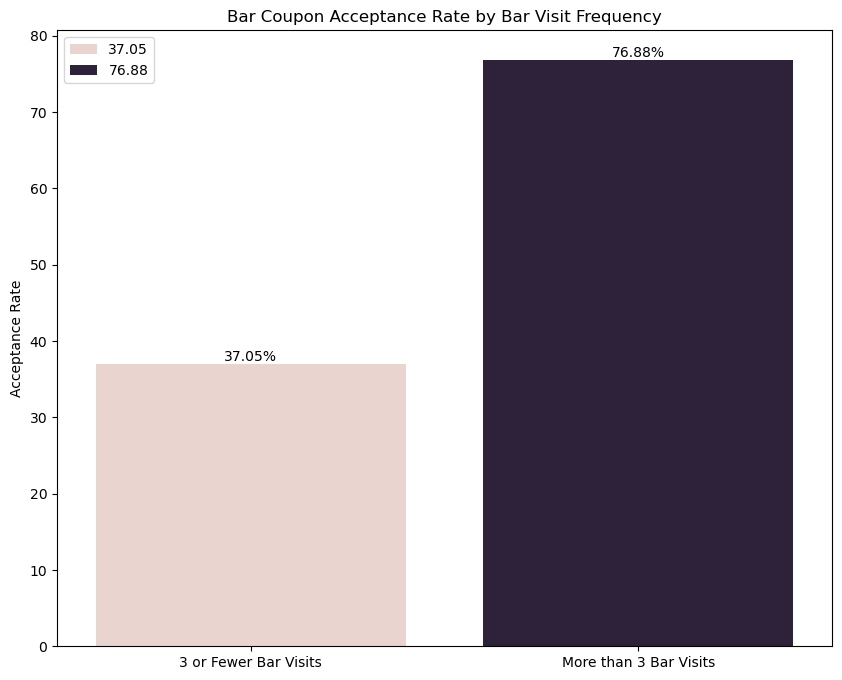

In [103]:
#From Bar Coupons DataFrame, create 2 groups (Less than equal 3 and more than 3)
group_less_equal_3 = bar_coupons_df[bar_coupons_df['bar'].isin(['never', 'less1', '1~3'])]
group_more_3 = bar_coupons_df[bar_coupons_df['bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for each group
acceptance_less_than_3 = (group_less_equal_3['has_coupon_accepted'].mean()) * 100
acceptance_more_than_3 = group_more_3['has_coupon_accepted'].mean() * 100

print("-" * 80)
print("\n\033[1mBar Coupon Acceptance Rate by Bar Visit Frequency\n\033[0m")

print(f"\n\033[1m*  Acceptance rate of 3 and less accepting bar coupons a month is: {acceptance_less_than_3:.2f}%\n\033[0m")

print(f"\n\033[1m*  Acceptance rate of more than 3 accepting bar coupons a month is: {acceptance_more_than_3:.2f}%\n\033[0m")
print("-" * 80)

# Create a bar plot
groups = ['3 or Fewer Bar Visits', 'More than 3 Bar Visits']
acceptance_rates = [acceptance_less_than_3, acceptance_more_than_3]

plt.figure(figsize=(10, 8))
ax=sns.barplot(x=groups, y=acceptance_rates, hue = [round(rate, 2) for rate in acceptance_rates])
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')

for i, rate in enumerate(acceptance_rates):
    ax.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.savefig('images/coupons/bar/bar_coupon_acceptance_rate_visits.png')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


--------------------------------------------------------------------------------

Bar Coupon Acceptance Rate Comparison by age 25


*  Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.52%

*  Acceptance rate for all other drivers: 39.33%

--------------------------------------------------------------------------------

There is a difference in acceptance rates. Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate.

--------------------------------------------------------------------------------


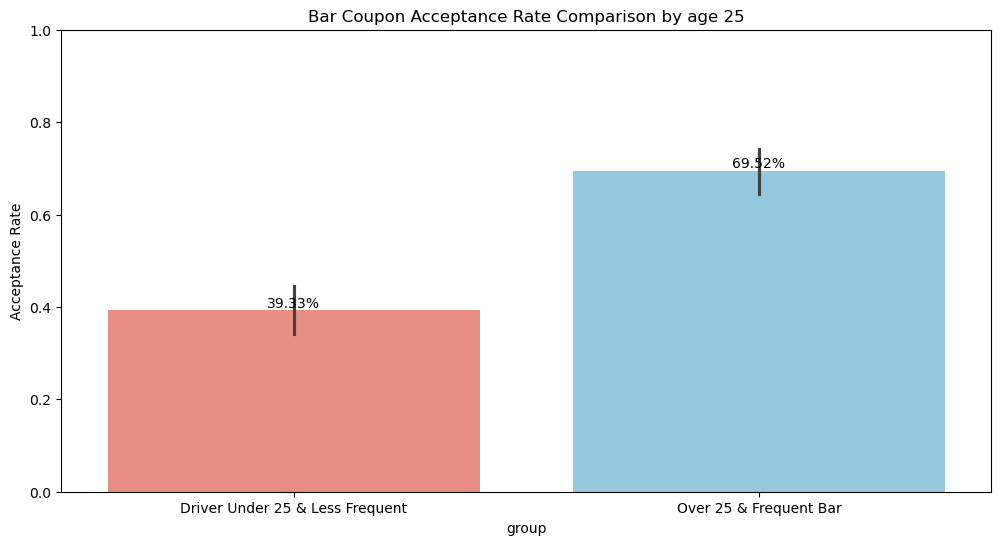

In [105]:
# Create new Dataframe having only 'bar' and 'has_coupon_accepted'
bar_coupon_acceptance_df = bar_coupons_df[['bar', 'has_coupon_accepted']].copy()

# Create a group of drivers who go to a bar more than once a month and are over 25
group_over_25 = bar_coupon_acceptance_df[(bar_coupons_df['bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > 25)].copy()

# Create a group of all other drivers those who go to a bar less than once a month and are 25 or younger
group_under_25 = bar_coupon_acceptance_df[(bar_coupons_df['bar'].isin(['never', 'less1'])) &  (bar_coupons_df['age'] <= 25)].copy()

# Calculate the acceptance rate for each group
acceptance_rate_over25 = group_over_25['has_coupon_accepted'].mean()
acceptance_rate_under25 = group_under_25['has_coupon_accepted'].mean()

# Print the results
print("-" * 80)
print("\n\033[1mBar Coupon Acceptance Rate Comparison by age 25\n\033[0m")

print(f"\n\033[1m*  Acceptance rate for drivers who go to a bar more than once a month and are over 25: {(acceptance_rate_over25)*100:.2f}%\n\033[0m")

print(f"\033[1m*  Acceptance rate for all other drivers: {(acceptance_rate_under25*100):.2f}%\n\033[0m")
print("-" * 80)

# Compare the acceptance rates and print the conclusion
if acceptance_rate_over25 > acceptance_rate_under25:
    print(f"\n\033[1mThere is a difference in acceptance rates. Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate.\n\033[0m")
elif acceptance_rate_over25 < acceptance_rate_under25:
    print(f"\n\033[1mThere is a difference in acceptance rates. Drivers who go to a bar more than once a month and are under 25 have a lower acceptance rate.\n\033[0m")
else:
    print(f"\n\033[1mThere is no significant difference in acceptance rates between the two groups.\n\033[0m")

print("-" * 80)

# Draw Barplot to visualize the acceptance rate

group_over_25.loc[:, 'group'] = 'Over 25 & Frequent Bar'
group_under_25.loc[:, 'group'] = 'Driver Under 25 & Less Frequent'
combined_data = pd.concat([group_under_25,group_over_25])

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=combined_data['group'], y=combined_data['has_coupon_accepted'], hue=combined_data['group'], palette=['salmon', 'skyblue'])
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison by age 25')
plt.ylim(0, 1)
acceptance_rates = combined_data.groupby('group')['has_coupon_accepted'].mean().values

for i, rate in enumerate(acceptance_rates):
    ax.text(i, rate, f'{rate*100:.2f}%', ha='center', va='bottom')

plt.savefig('images/coupons/bar/bar_coupon_acceptance_rate_age.png')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


--------------------------------------------------------------------------------

Acceptance rate for drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 68.79%

Acceptance rate for all other drivers: 29.28%

--------------------------------------------------------------------------------

Compare the acceptance rates and print the conclusion

There is a difference in acceptance rates. Drivers who go to a bar more than once a month without kids and their occupations other than farming, fishing, or forestry have a higher acceptance rate

--------------------------------------------------------------------------------


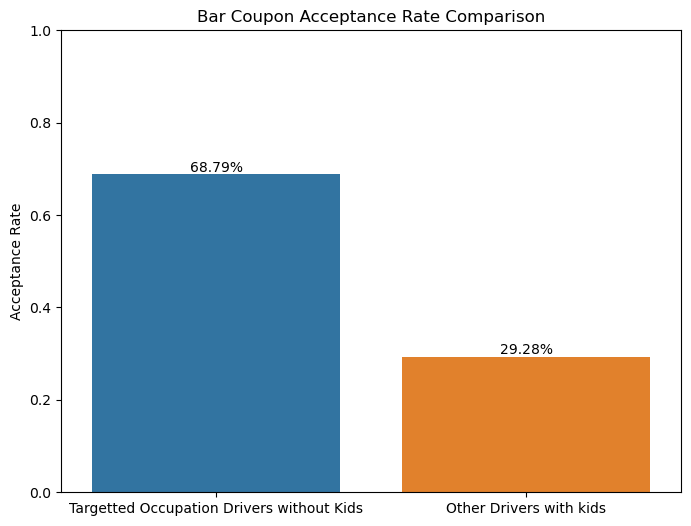

In [107]:

# Create a group of drivers who go to a bar more than once a month and
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry

group_1 = bar_coupons_df[(bar_coupons_df['bar'].isin(['1~3', '4~8', 'gt8'])) &
                (bar_coupons_df['passenger'] != 'Kid') &
                (~bar_coupons_df['occupation'].isin(['Farming, Fishing, and Forestry']))
                ]

group_2 = bar_coupons_df[~bar_coupons_df.index.isin(group_1.index)]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['has_coupon_accepted'].mean()
acceptance_rate_group_2 = group_2['has_coupon_accepted'].mean()

# Print the results
print("-" * 80)
print(f"\n\033[1mAcceptance rate for drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {(acceptance_rate_group_1)*100:.2f}%\n\033[0m")
print(f"\033[1mAcceptance rate for all other drivers: {(acceptance_rate_group_2)*100:.2f}%\n\033[0m")
print("-" * 80)

# Compare the acceptance rates and print the conclusion
print(f"\n\033[1mCompare the acceptance rates and print the conclusion\033[0m")
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print(f"\n\033[1mThere is a difference in acceptance rates. Drivers who go to a bar more than once a month without kids and their occupations other than farming, fishing, or forestry have a higher acceptance rate\n\033[0m")
elif acceptance_rate_group_1 < acceptance_rate_group_2:
    print(f"\n\033[1mThere is a difference in acceptance rates. Drivers who go to a bar more than once a month with kids and their occupations are farming, fishing, or forestry have a lower acceptance rate\n\033[0m")
else:
    print(f"\n\033[1mThere is no significant difference in acceptance rates between the two groups.\n\033[0m")
    print("There is no significant difference in acceptance rates between the two groups.")

print("-" * 80)
# Draw Barplot to visualize the acceptance rate
groups = ['Targetted Occupation Drivers without Kids', 'Other Drivers with kids']
acceptance_rates = [acceptance_rate_group_1, acceptance_rate_group_2]

plt.figure(figsize=(8, 6))
ax=sns.barplot(x=groups, y=acceptance_rates, hue=groups)
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.ylim(0, 1)

for i, rate in enumerate(acceptance_rates):
    ax.text(i, rate, f'{rate*100:.2f}%', ha='center', va='bottom')

plt.savefig('images/coupons/bar/bar_coupon_acceptance_rate_occupation.png')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



--------------------------------------------------------------------------------
Acceptance rate for Non widowed drivers goes to bar with no passengers as kids: 68.79%

--------------------------------------------------------------------------------

Acceptance rate for Drivers under 30 who goes to bar: 72.17%

--------------------------------------------------------------------------------

Acceptance rate for all Drivers under 30 who goes to bar more than 4 times and income is less than $50000: 59.36%

--------------------------------------------------------------------------------

Comparison between Group Non widowed drivers goes to bar with no passengers as kids and Drivers under 30 who goes to bar

--------------------------------------------------------------------------------
Non widowed drivers goes to bar with no passengers as kids have a lower acceptance rate than Drivers under 30 who goes to bar

------------------------------------------------------------------------------

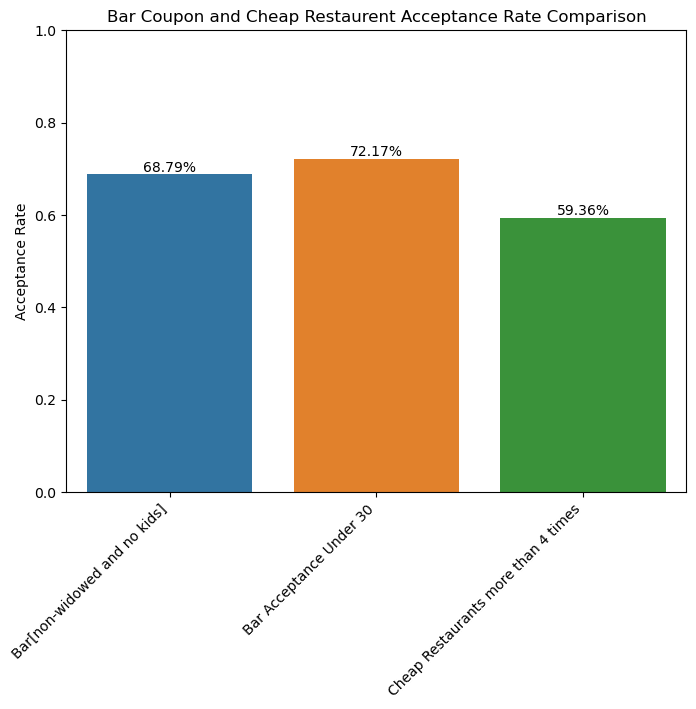

In [109]:

# Create a group of drivers who go to bars more than once a month, had passengers who were not kids, and were not widowed

driver_bar_more_1 = bar_coupons_df[(bar_coupons_df['bar'].isin(['1~3', '4~8', 'gt8']))]

group_1 = driver_bar_more_1[(driver_bar_more_1['passenger'] != 'Kid') & (driver_bar_more_1['marital_status'] != 'Widowed')]

# Create a group of drivers who go to bars more than once a month and are under the age of 30
group_2 = driver_bar_more_1[(driver_bar_more_1['age'] < 30)]

# Create a group of drivers who go to cheaper restaurent more than once a month and income under $50000.00
group_3 = data_modified_df[(data_modified_df['restaurant_under_20'].isin(['4~8', 'gt8'])) &
                data['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['has_coupon_accepted'].mean()
acceptance_rate_group_2 = group_2['has_coupon_accepted'].mean()
acceptance_rate_group_3 = group_3['has_coupon_accepted'].mean()

# Print the results
group_1_desc = "Non widowed drivers goes to bar with no passengers as kids"
group_2_desc = "Drivers under 30 who goes to bar"
group_3_desc = "Drivers goes to cheap restaurants"
print("-" * 80)
print(f"Acceptance rate for {group_1_desc}: {(acceptance_rate_group_1)*100:.2f}%\n")
print("-" * 80)
print(f"\nAcceptance rate for {group_2_desc}: {(acceptance_rate_group_2)*100:.2f}%\n")
print("-" * 80)
print(f"\nAcceptance rate for all {group_2_desc} more than 4 times and income is less than $50000: {(acceptance_rate_group_3)*100:.2f}%\n")
print("-" * 80)

# Compare the acceptance rates and print the conclusion between Group 1 and Group 2
print(f"\n\033[1mComparison between Group {group_1_desc} and {group_2_desc}\n\033[0m")
print("-" * 80)
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print(f"{group_1_desc} have a higher acceptance rate than {group_2_desc}\n")
elif acceptance_rate_group_1 < acceptance_rate_group_2:
    print(f"{group_1_desc} have a lower acceptance rate than {group_2_desc}\n")
else:
    print(f"\nThere is no significant difference in acceptance rates between the groups of {group_1_desc} and {group_2_desc}.\n")

# Compare the acceptance rates and print the conclusion between Group 1 and Group 3
print("-" * 80)
print(f"\n\033[1mComparison between Group {group_1_desc} and {group_3_desc}\n\033[0m")
if acceptance_rate_group_1 > acceptance_rate_group_3:
    print(f"\n{group_1_desc} have a higher acceptance rate than {group_3_desc}\n")
elif acceptance_rate_group_1 < acceptance_rate_group_3:
    print(f"\n{group_1_desc} have a lower acceptance rate than {group_3_desc}\n")
else:
    print(f"\nThere is no significant difference in acceptance rates between the {group_1_desc} and {group_3_desc} groups.\n")

# Compare the acceptance rates and print the conclusion between Group 2 and Group 3
print("-" * 80)
print(f"\n\033[1mComparison between Group {group_2_desc} and {group_3_desc}\n\033[0m")
if acceptance_rate_group_2 > acceptance_rate_group_3:
    print(f"\n{group_2_desc} have a higher acceptance rate than {group_3_desc}\n")
elif acceptance_rate_group_2 < acceptance_rate_group_3:
    print(f"\n{group_2_desc} have a lower acceptance rate than {group_3_desc}\n")
else:
    print(f"\nThere is no significant difference in acceptance rates between the {group_2_desc} and {group_3_desc} groups.\n")

print("-" * 80)

# Draw Barplot to visualize the acceptance rate
groups = ['Bar[non-widowed and no kids]', 'Bar Acceptance Under 30', 'Cheap Restaurants more than 4 times']
acceptance_rates = [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]

plt.figure(figsize=(8, 6))
ax=sns.barplot(x=groups, y=acceptance_rates, hue=groups)
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Bar Coupon and Cheap Restaurent Acceptance Rate Comparison')
plt.ylim(0, 1)
for i, v in enumerate(acceptance_rates):
    ax.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom')
plt.savefig('images/coupons/bar/bar_coupon_acceptance_rate_other.png')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


*   There's a strong positive correlation between the frequency of bar visits and coupon acceptance.
*   Observations indicate that drivers over 25 with non-kid passengers and occupations other than farming, fishing, or forestry have higher acceptance rates.
*   Drivers under 30 who frequent bars demonstrate a higher likelihood of accepting bar coupons. This suggest that younger demographics may be more responsive to such coupons.
*   A moderate correlation is observed between drivers visiting cheap restaurants frequently with incomes under 50K and acceptance of bar coupons. This could indicate that these drivers are more open to deals and offers related to dining and entertainment, including bars.
*   While correlations with marital status were not strong, the observations suggest that non-widowed drivers with non-kid passengers and frequent bar visits might be slightly more inclined to accept bar coupons.

**A profile emerges of a driver who is more likely to accept bar coupons:**

*   Frequents bars more than once a month.
*   Is potentially over 25 and under 30.
*   Has non-kid passengers.
*   May have an occupation other than farming, fishing, or forestry
*   Could be value-conscious and visit cheap restaurants often
*   Might be non-widowed, although marital status correlation is less prominent.





### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Based on prompt 5 using Bar Plot to visualize coupon column, using 'Carry out & Take away' coupons to determine the characteristics of passengers who accept the coupons

In [114]:
# Create a new DataFrame that contains just the 'Carry out & Take away' coupons.
carry_out_df = data_modified_df[data_modified_df['coupon'] == 'Carry out & Take away']
print(type(carry_out_df))
carry_out_df.sample(10)

<class 'pandas.core.frame.DataFrame'>


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_under_20,restaurant_20_to_50,is_travel_time_5min,is_travel_time_15min,is_travel_time_25min,is_same_direction,is_opposite_direction,has_coupon_accepted
3297,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,4~8,4~8,1~3,less1,1,1,0,0,1,1
4128,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,31,Married partner,...,never,1~3,1~3,never,1,0,0,1,0,1
5516,Home,Alone,Sunny,80,10PM,Carry out & Take away,1d,Male,21,Unmarried partner,...,less1,1~3,less1,never,1,0,0,1,0,1
9549,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,20,Unmarried partner,...,1~3,less1,1~3,less1,1,1,0,0,1,1
1900,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,31,Single,...,1~3,gt8,1~3,never,1,1,0,0,1,1
6002,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,51,Divorced,...,never,4~8,1~3,never,1,0,0,1,0,0
10835,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,Single,...,gt8,4~8,1~3,less1,1,1,0,1,0,1
10378,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,1,0,1,0,0
12491,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,0,0,0,1,1
99,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1


What Proportion of Carry Out & Take away coupons were accepted

--------------------------------------------------------------------------------

Carry Out Coupon Acceptance Proportion Distribution


*  Proportion of the Carry Out coupons accepted: 73.00%


*  Proportion of the Carry Out coupons rejected: 27.00%

--------------------------------------------------------------------------------


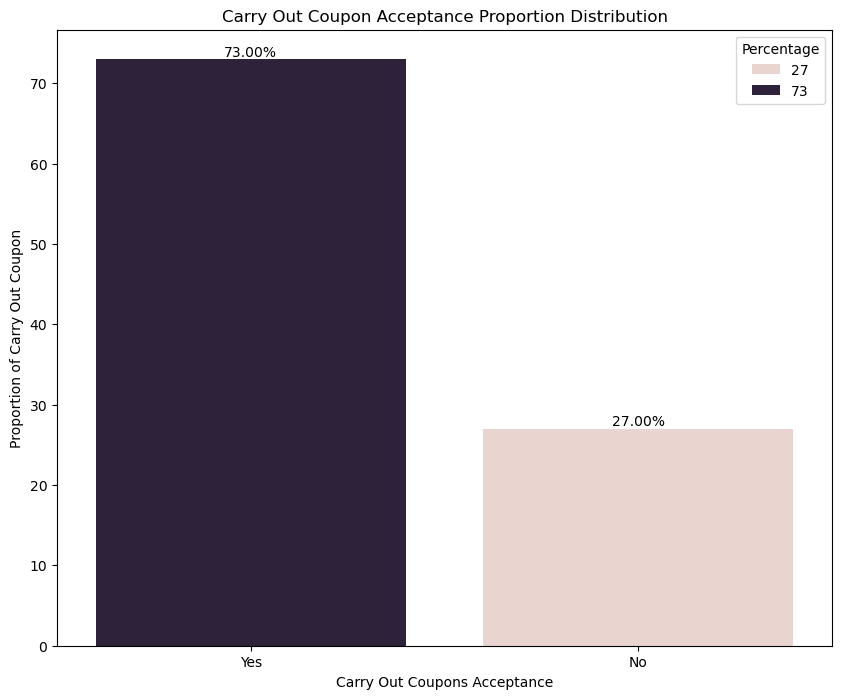

In [161]:
carry_out_coupons_accepted = carry_out_df['has_coupon_accepted'].mean().round(2)
carry_out_coupons_rejected = 1 - carry_out_coupons_accepted
proportion_carry_out_coupons_accepted = (carry_out_coupons_accepted * 100).round(2)
proportion_carry_out_coupons_rejected = 100 - proportion_carry_out_coupons_accepted

print("-" * 80)
print("\n\033[1mCarry Out Coupon Acceptance Proportion Distribution\n\033[0m")
print(f"\n\033[1m*  Proportion of the Carry Out coupons accepted: {proportion_carry_out_coupons_accepted:.2f}%\n\033[0m")
print(f"\n\033[1m*  Proportion of the Carry Out coupons rejected: {proportion_carry_out_coupons_rejected:.2f}%\n\033[0m")
print("-" * 80)

# Draw BarPlot to visualize coupons acceptance ratio
carry_out_acceptance_count_df = carry_out_df['has_coupon_accepted'].value_counts(normalize=True).round(2).reset_index()
carry_out_acceptance_count_df.columns = ['has_coupon_accepted', 'Percentage']
carry_out_acceptance_count_df['Percentage'] = (carry_out_acceptance_count_df['Percentage'] * 100).round(0).astype(int)
carry_out_acceptance_count_df['has_coupon_accepted'] = carry_out_acceptance_count_df['has_coupon_accepted'].replace({1: 'Yes', 0: 'No'})

plt.figure(figsize=(10, 8))
ax=sns.barplot(x='has_coupon_accepted', y='Percentage', data=carry_out_acceptance_count_df, hue='Percentage')
plt.xlabel('Carry Out Coupons Acceptance')
plt.ylabel('Proportion of Carry Out Coupon')
plt.title('Carry Out Coupon Acceptance Proportion Distribution')
for i, row in carry_out_acceptance_count_df.iterrows():
    rate = row['Percentage']
    ax.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.savefig('images/coupons/carry_away/carry_away_acceptance_distribution.png')
plt.show()

Based on Contextual and User attributes columns, generating Bar Plot to visualize the 'Carry Out' coupons acceptance based on attributes

In [118]:
print(carry_out_df.columns)

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'marital_status', 'has_children',
       'education', 'occupation', 'income', 'bar', 'coffee_house',
       'carry_away', 'restaurant_under_20', 'restaurant_20_to_50',
       'is_travel_time_5min', 'is_travel_time_15min', 'is_travel_time_25min',
       'is_same_direction', 'is_opposite_direction', 'has_coupon_accepted'],
      dtype='object')


--------------------------------------------------------------------------------

destination

       destination accepted  count
0             Home      Yes    138
1             Home       No    513
2  No Urgent Place      Yes    232
3  No Urgent Place       No    742
4             Work       No    254
5             Work      Yes    465


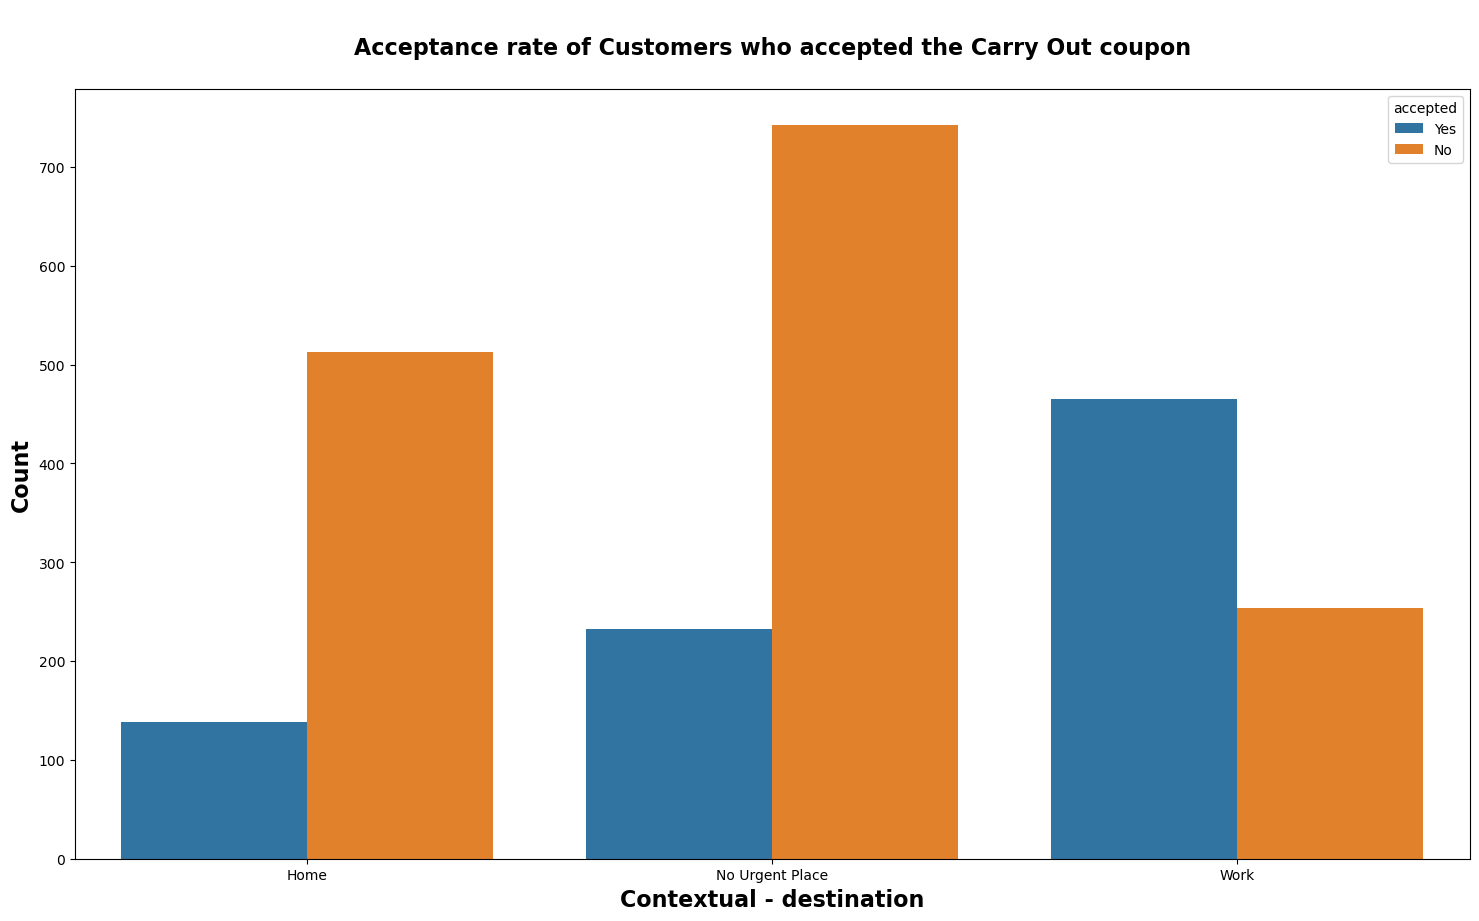

--------------------------------------------------------------------------------

age

    age accepted  count
0    20      Yes     31
1    20       No     80
2    21      Yes    123
3    21       No    352
4    26       No    123
5    26      Yes    336
6    31      Yes    115
7    31      Yes    272
8    36      Yes     62
9    36       No    185
10   41      Yes     58
11   41      Yes    147
12   46      Yes     34
13   46      Yes     87
14   51      Yes     78
15   51       No    261


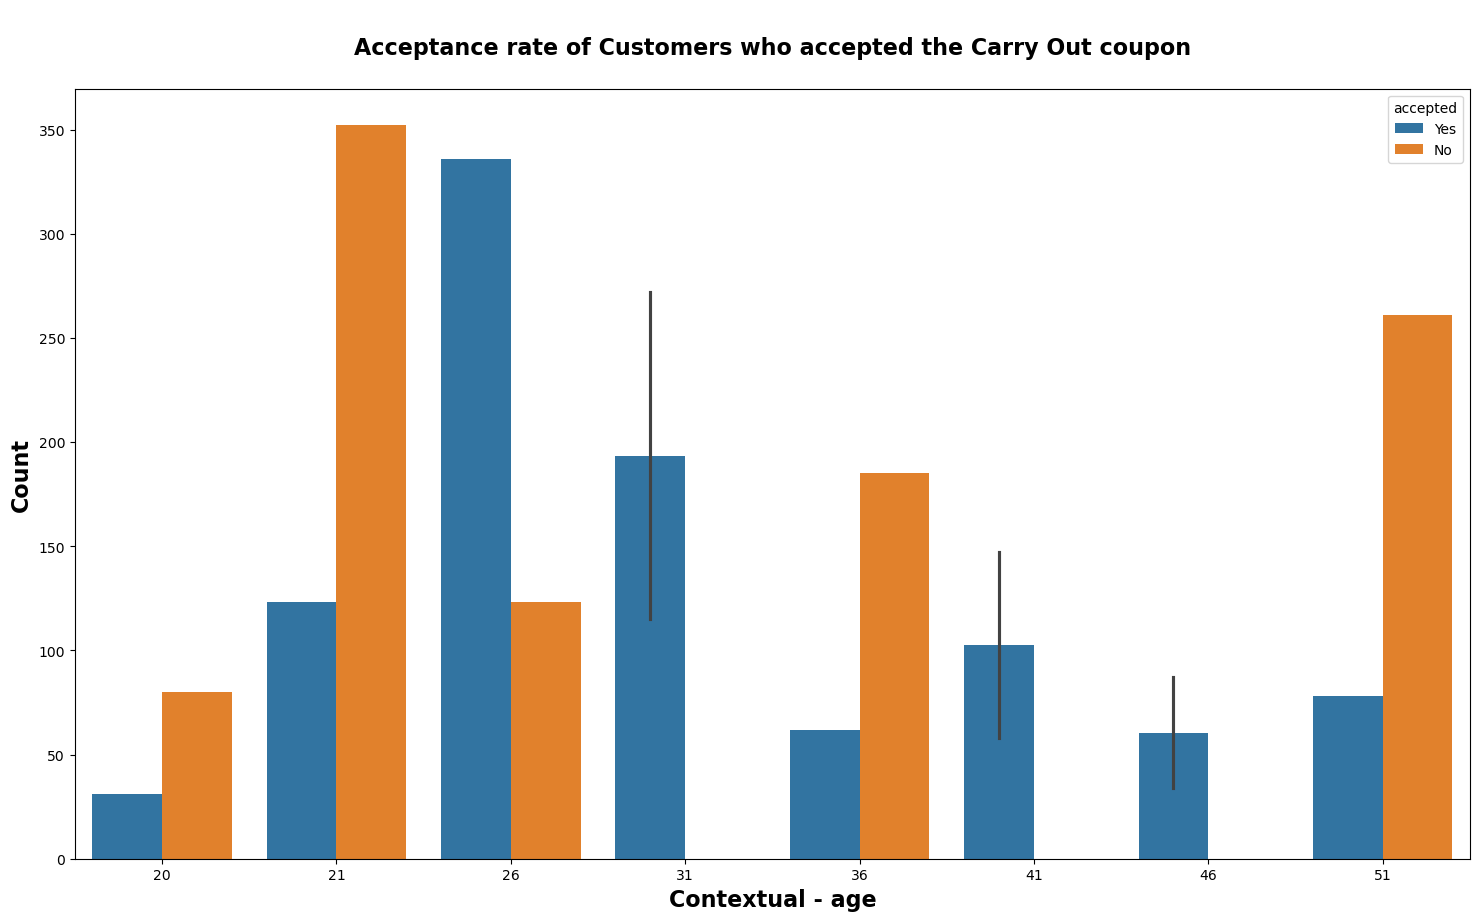

--------------------------------------------------------------------------------

passenger

   passenger accepted  count
0      Alone      Yes    374
1      Alone       No    987
2  Friend(s)      Yes    179
3  Friend(s)       No    558
4     Kid(s)       No     45
5     Kid(s)      Yes    106
6    Partner      Yes     26
7    Partner      Yes     69


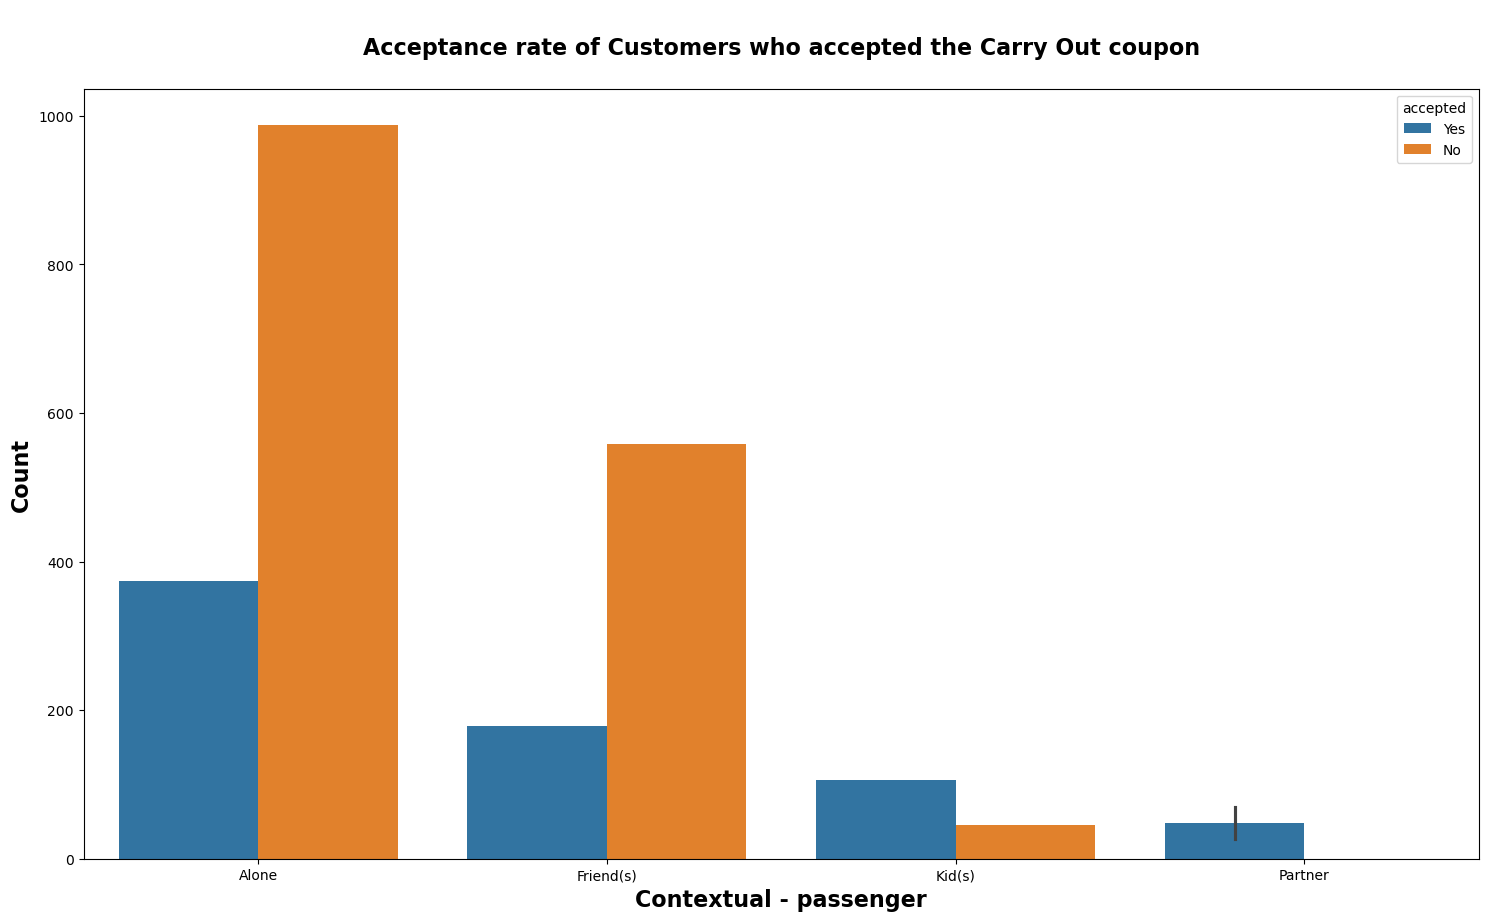

--------------------------------------------------------------------------------

weather

  weather accepted  count
0   Rainy      Yes    124
1   Rainy       No    193
2   Snowy      Yes     90
3   Snowy       No    215
4   Sunny       No    410
5   Sunny      Yes   1312


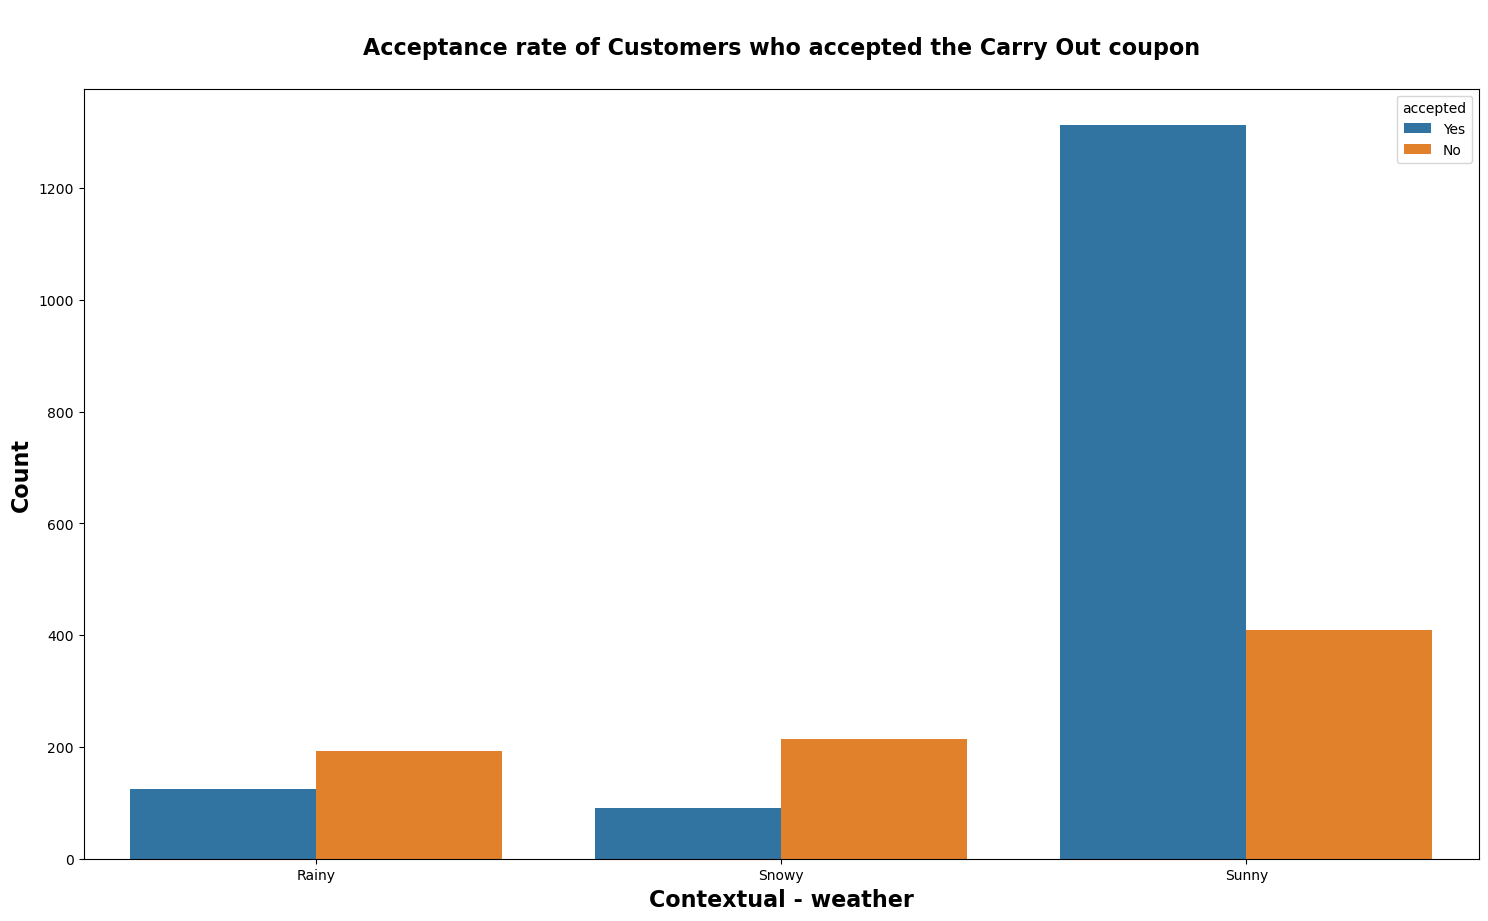

--------------------------------------------------------------------------------

temperature

   temperature accepted  count
0           30      Yes    183
1           30       No    564
2           55      Yes    162
3           55       No    412
4           80       No    279
5           80      Yes    744


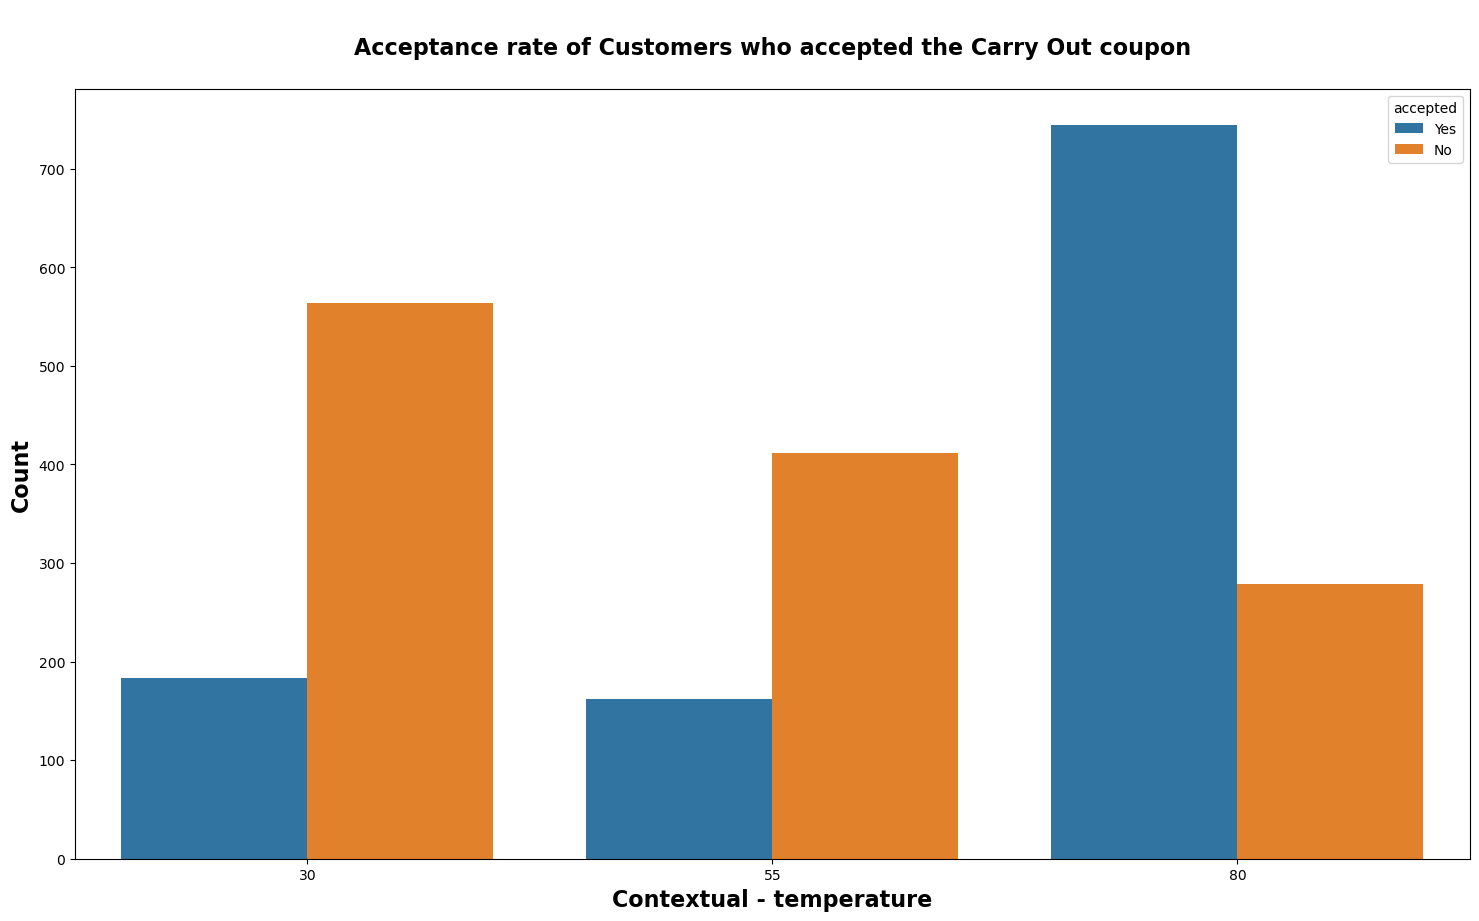

--------------------------------------------------------------------------------

gender

   gender accepted  count
0  Female      Yes    348
1  Female       No    863
2    Male      Yes    276
3    Male       No    857


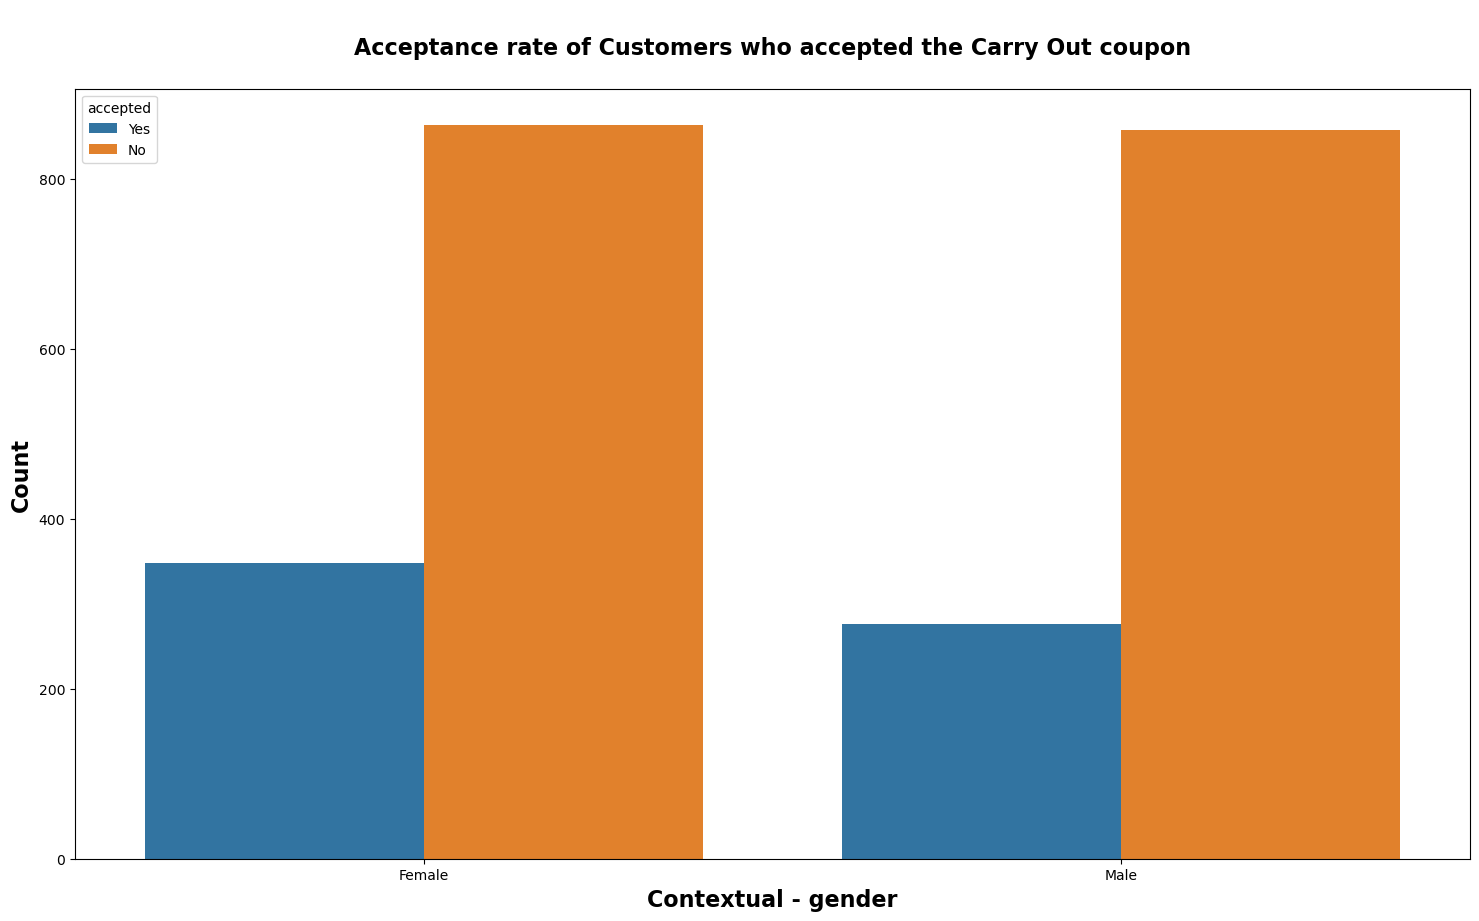

--------------------------------------------------------------------------------

marital_status

      marital_status accepted  count
0           Divorced      Yes     29
1           Divorced       No     74
2    Married partner      Yes    253
3    Married partner       No    683
4             Single       No    227
5             Single      Yes    665
6  Unmarried partner      Yes    111
7  Unmarried partner      Yes    276
8            Widowed      Yes      4
9            Widowed       No     22


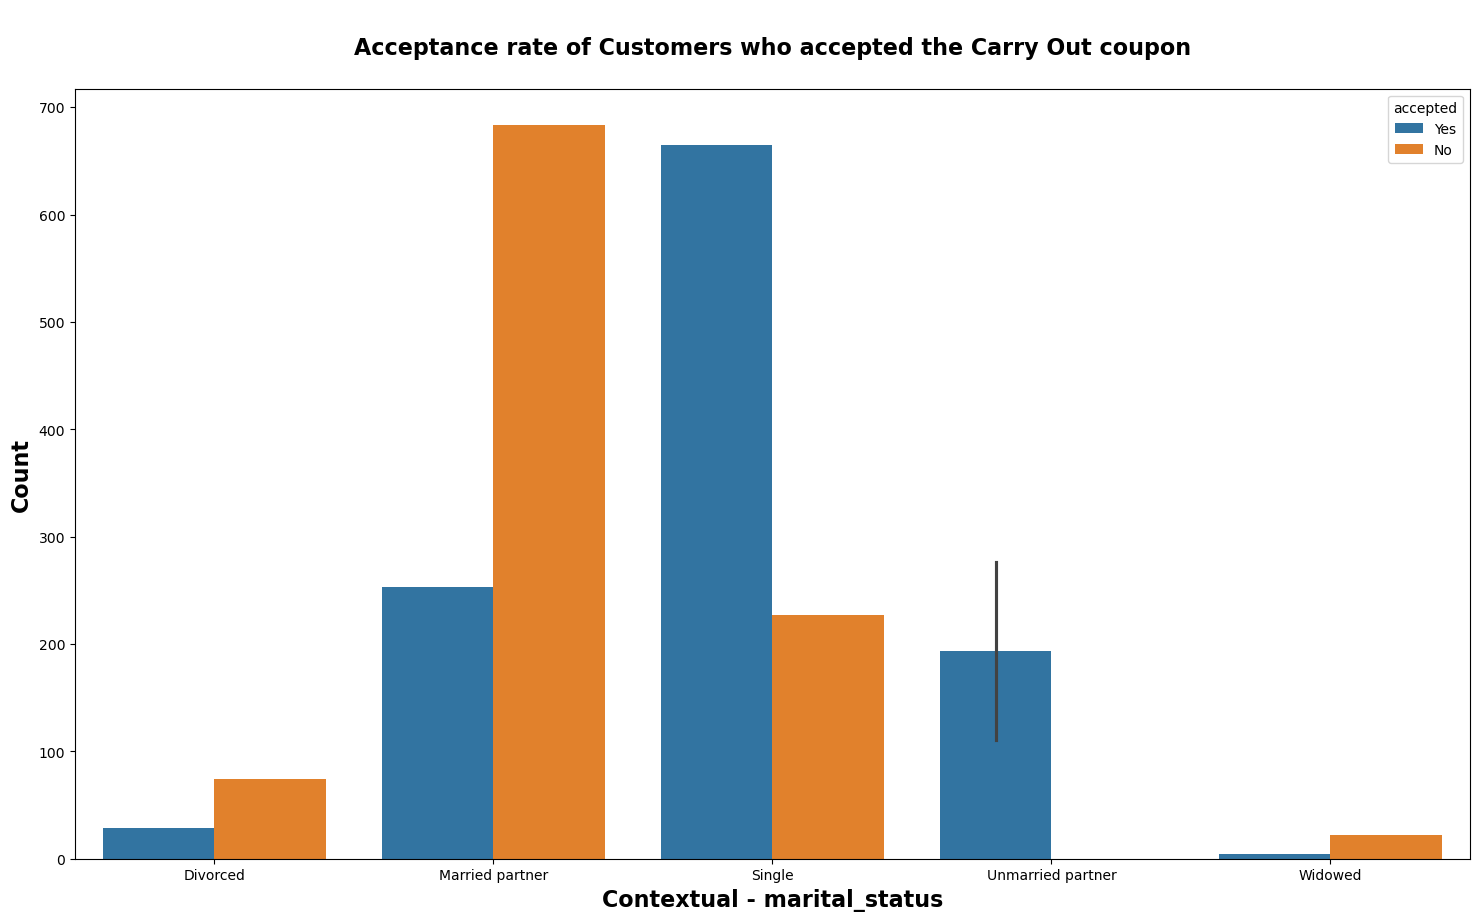

--------------------------------------------------------------------------------

has_children

   has_children accepted  count
0             0      Yes    361
1             0       No    971
2             1      Yes    263
3             1       No    749


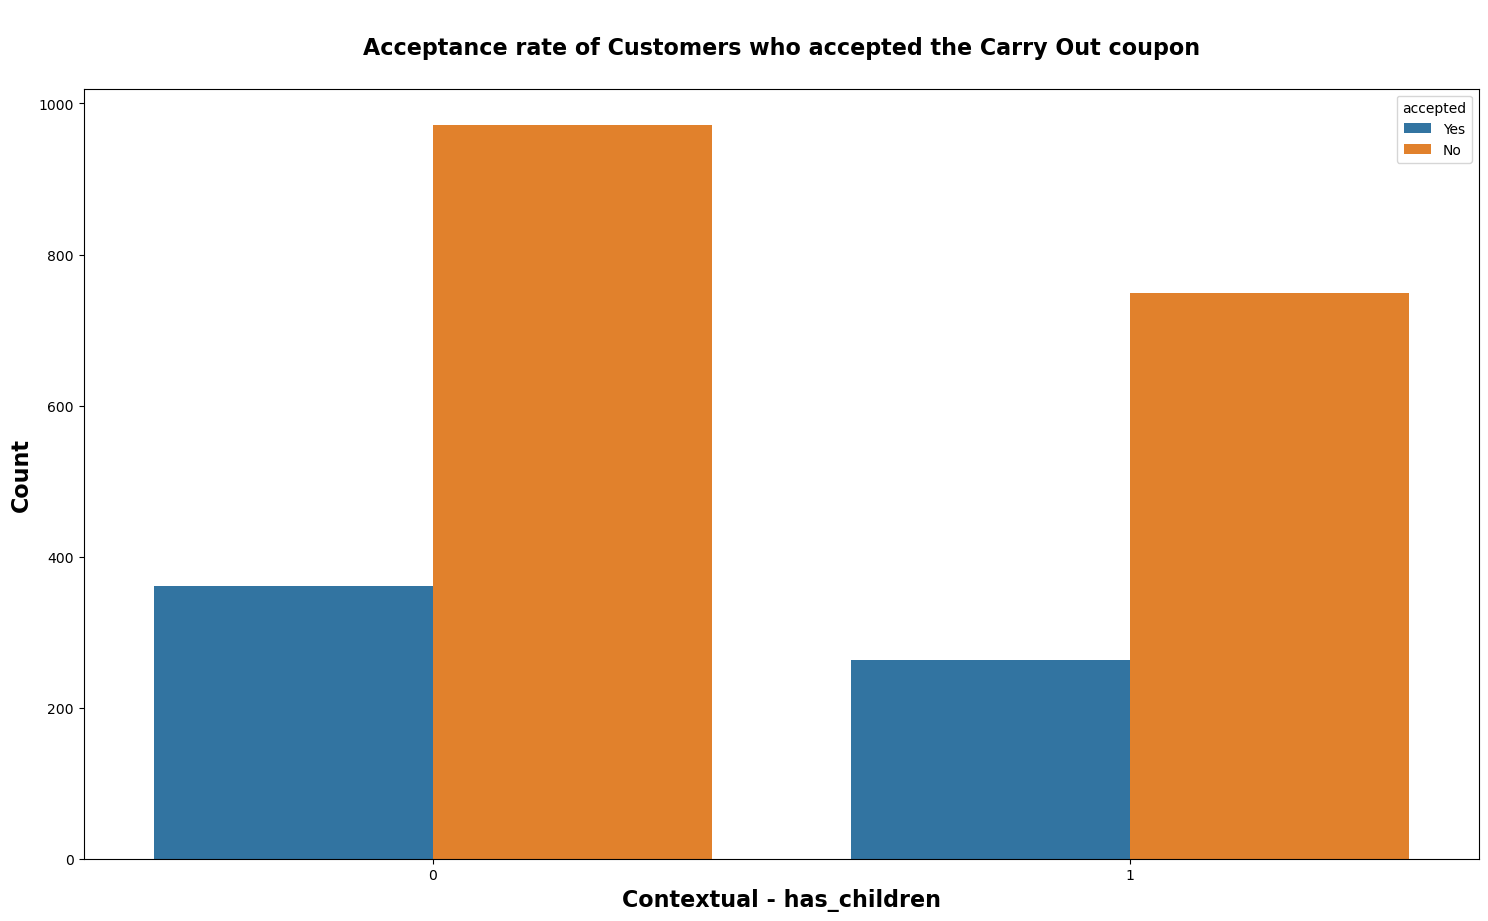

--------------------------------------------------------------------------------

education

                                 education accepted  count
0                        Associates degree      Yes     39
1                        Associates degree       No    175
2                         Bachelors degree      Yes    228
3                         Bachelors degree       No    572
4   Graduate degree (Masters or Doctorate)       No    123
5   Graduate degree (Masters or Doctorate)      Yes    222
6                     High School Graduate      Yes     44
7                     High School Graduate      Yes    131
8                         Some High School      Yes      1
9                         Some High School       No     15
10                Some college - no degree      Yes    189
11                Some college - no degree      Yes    605


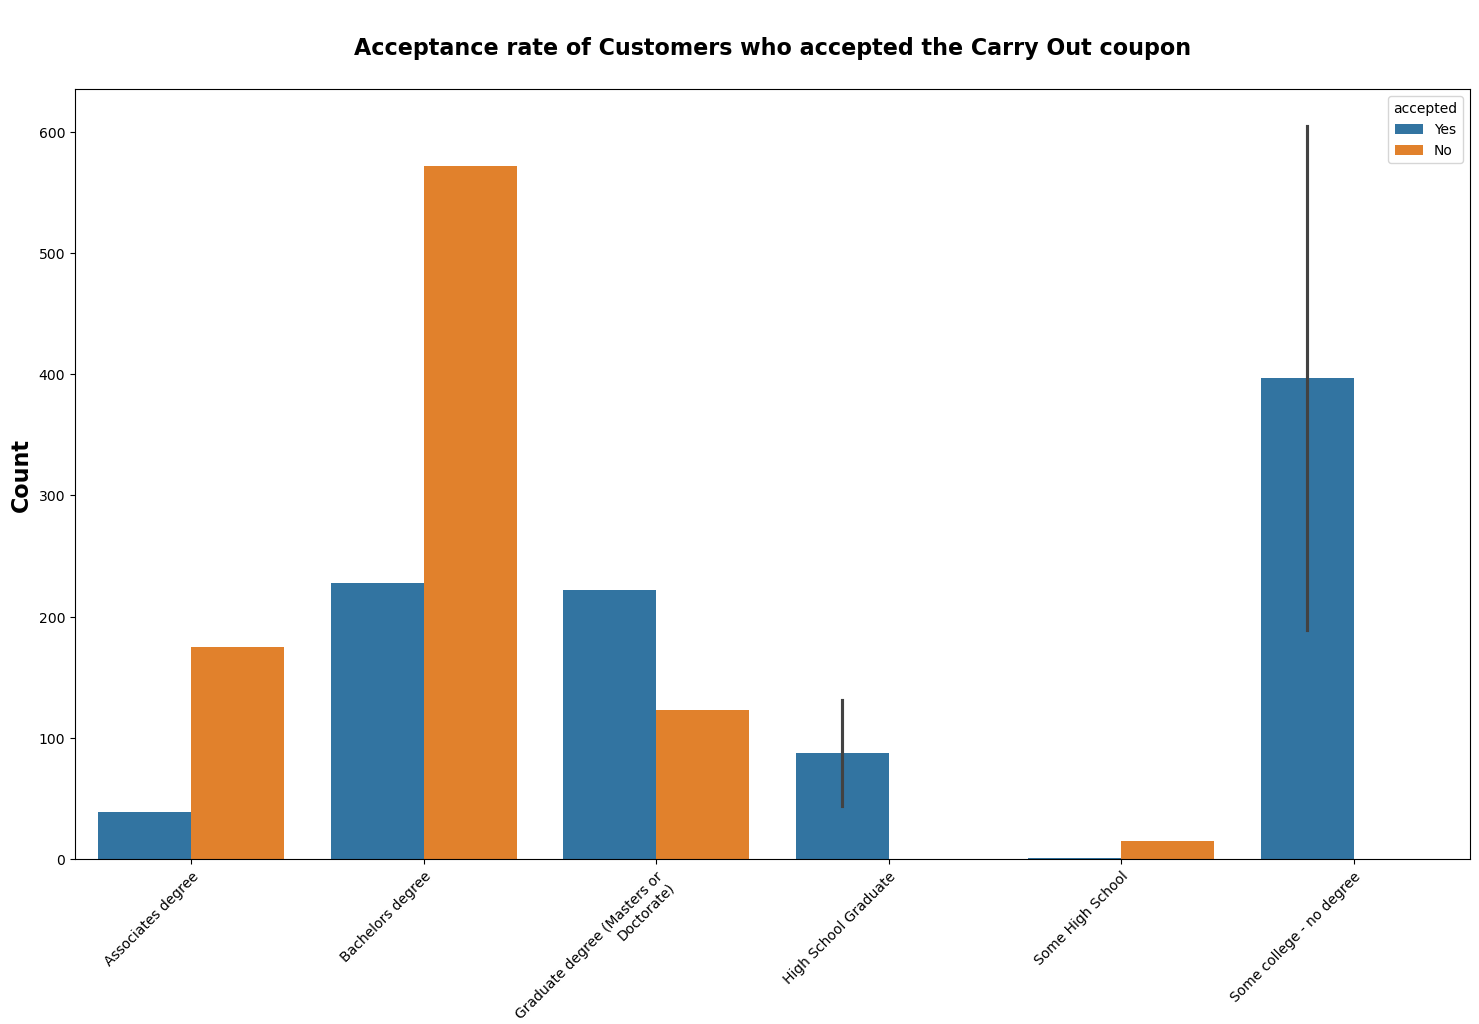

--------------------------------------------------------------------------------

occupation

                                   occupation accepted  count
0                  Architecture & Engineering      Yes     11
1                  Architecture & Engineering       No     19
2    Arts Design Entertainment Sports & Media      Yes     42
3    Arts Design Entertainment Sports & Media       No     71
4   Building & Grounds Cleaning & Maintenance       No      9
5                        Business & Financial      Yes     19
6                        Business & Financial      Yes     84
7                 Community & Social Services      Yes     13
8                 Community & Social Services      Yes     32
9                     Computer & Mathematical       No     73
10                    Computer & Mathematical      Yes    180
11                  Construction & Extraction      Yes      1
12                  Construction & Extraction      Yes     27
13                 Education&Training&

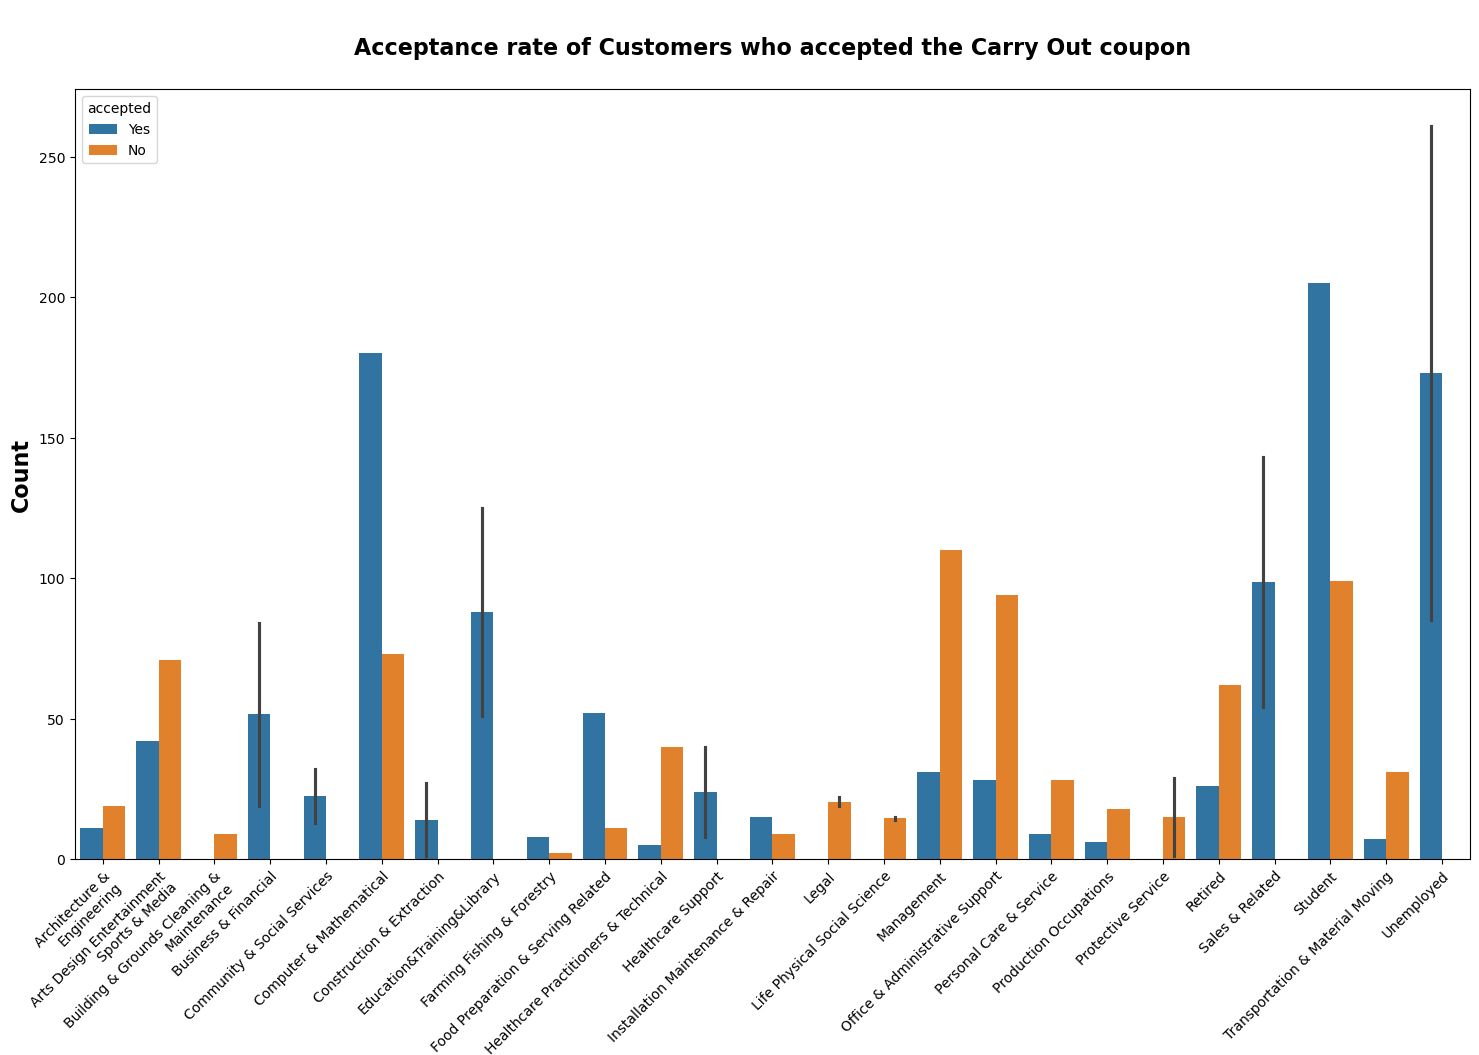

--------------------------------------------------------------------------------

income

              income accepted  count
0    $100000 or More      Yes     95
1    $100000 or More       No    222
2    $12500 - $24999      Yes     84
3    $12500 - $24999       No    254
4    $25000 - $37499       No     83
5    $25000 - $37499      Yes    292
6    $37500 - $49999      Yes     96
7    $37500 - $49999      Yes    235
8    $50000 - $62499      Yes     67
9    $50000 - $62499       No    223
10   $62500 - $74999      Yes     43
11   $62500 - $74999      Yes    111
12   $75000 - $87499      Yes     57
13   $75000 - $87499      Yes    111
14   $87500 - $99999      Yes     48
15   $87500 - $99999       No    119
16  Less than $12500      Yes     51
17  Less than $12500       No    153


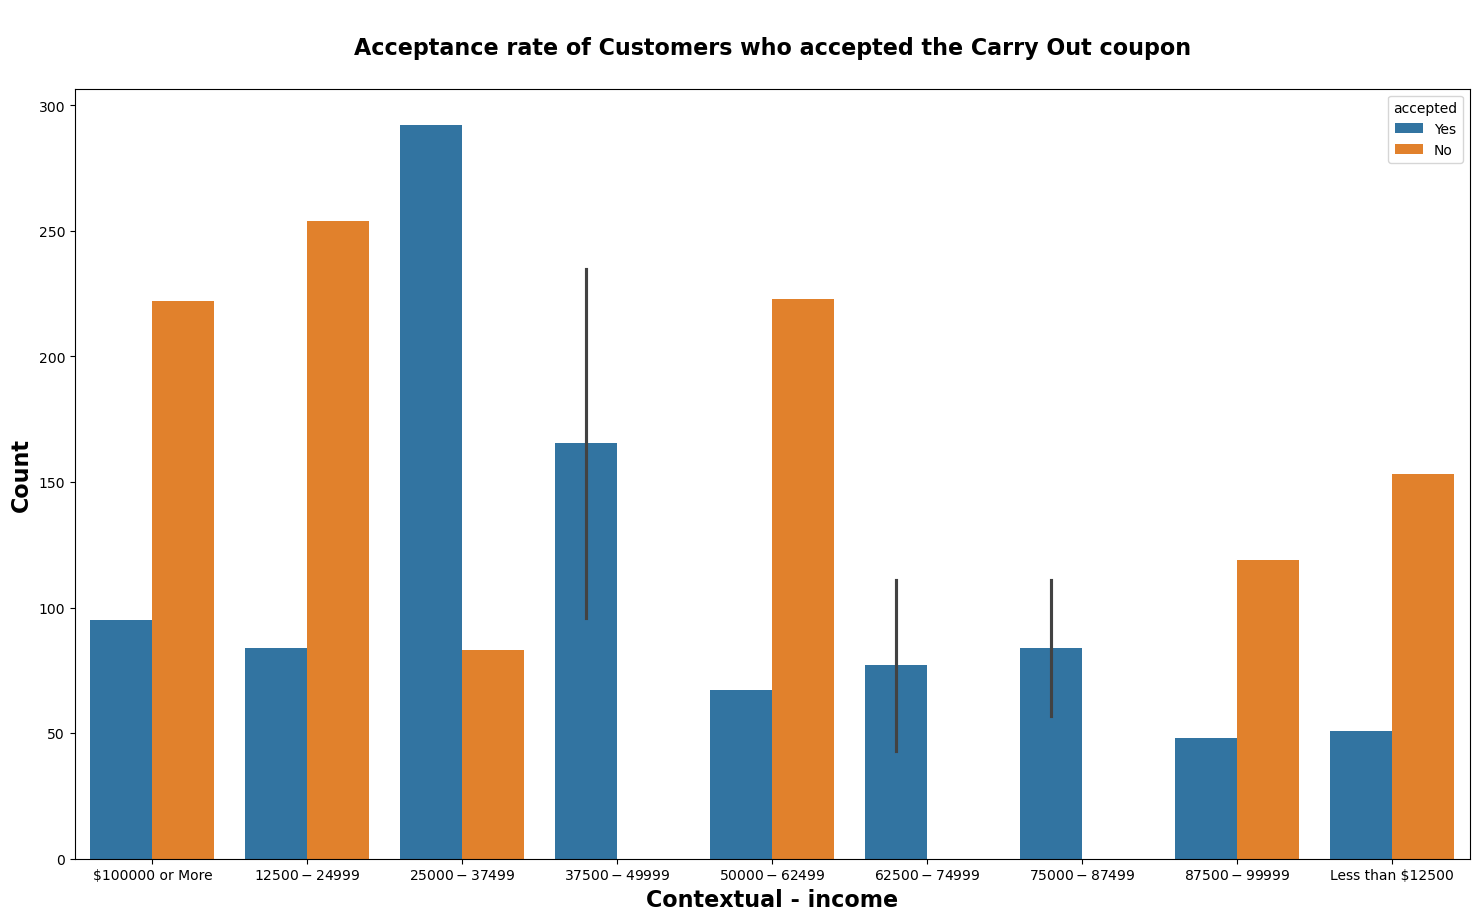

--------------------------------------------------------------------------------

coffee_house

  coffee_house accepted  count
0          1~3      Yes    150
1          1~3       No    434
2          4~8      Yes     90
3          4~8       No    252
4          gt8       No     84
5          gt8      Yes    131
6        less1      Yes    167
7        less1      Yes    481
8        never      Yes    133
9        never       No    422


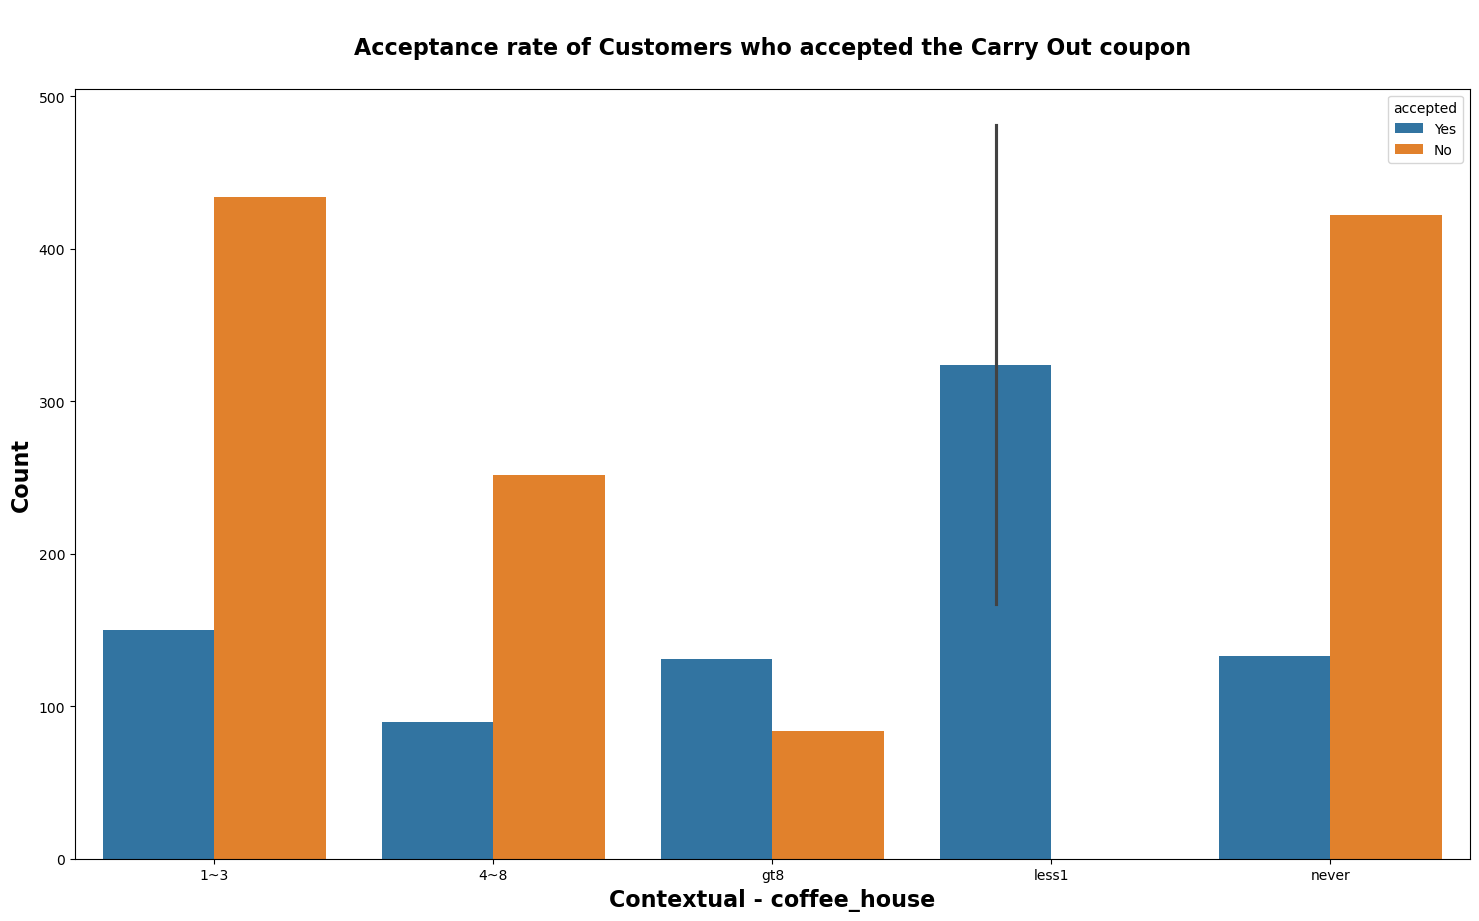

--------------------------------------------------------------------------------

restaurant_under_20

  restaurant_under_20 accepted  count
0                 1~3      Yes    280
1                 1~3       No    736
2                 4~8      Yes    168
3                 4~8       No    494
4                 gt8       No     56
5                 gt8      Yes    174
6               less1      Yes    111
7               less1      Yes    279
8               never      Yes      9
9               never       No     37


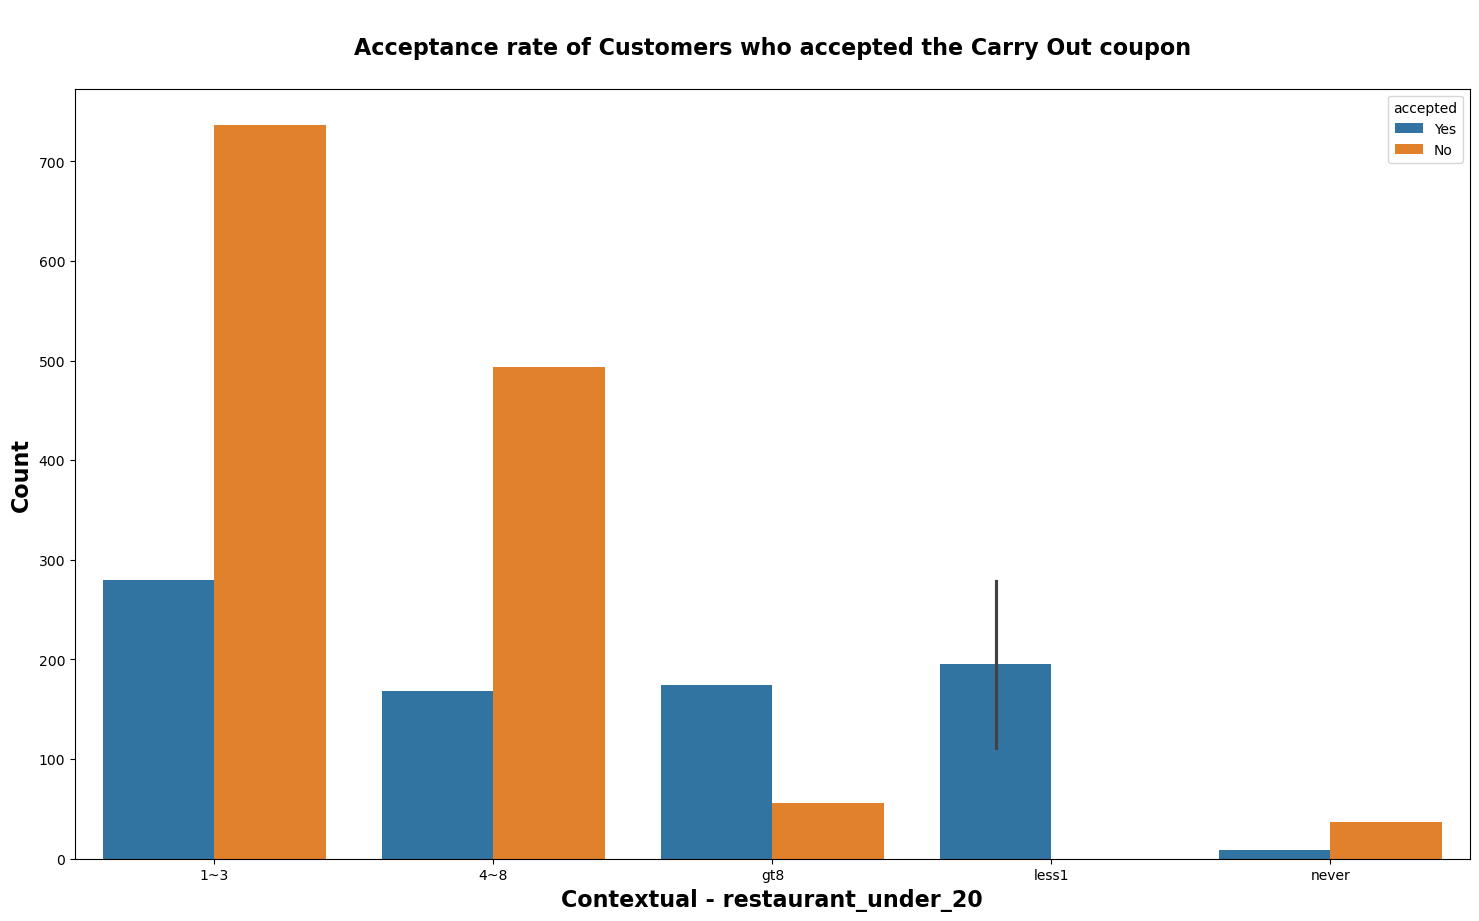

--------------------------------------------------------------------------------

restaurant_20_to_50

  restaurant_20_to_50 accepted  count
0                 1~3      Yes    155
1                 1~3       No    438
2                 4~8      Yes     37
3                 4~8       No    113
4                 gt8       No     15
5                 gt8      Yes     32
6               less1      Yes    316
7               less1      Yes    852
8               never      Yes    101
9               never       No    285


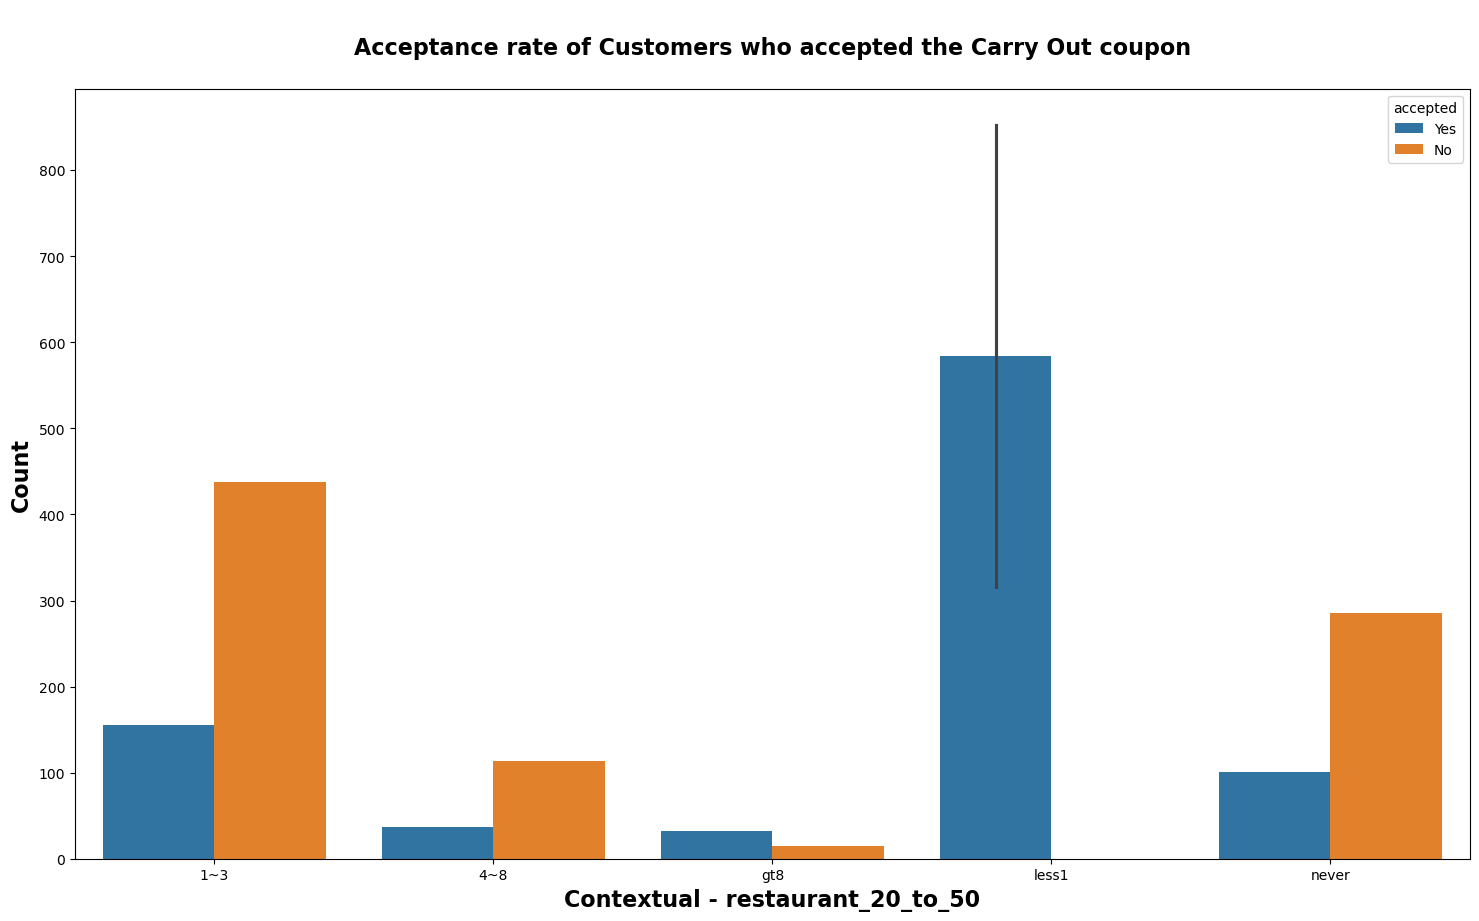

--------------------------------------------------------------------------------

is_travel_time_5min

   is_travel_time_5min accepted  count
0                    1      Yes    624
1                    1       No   1720


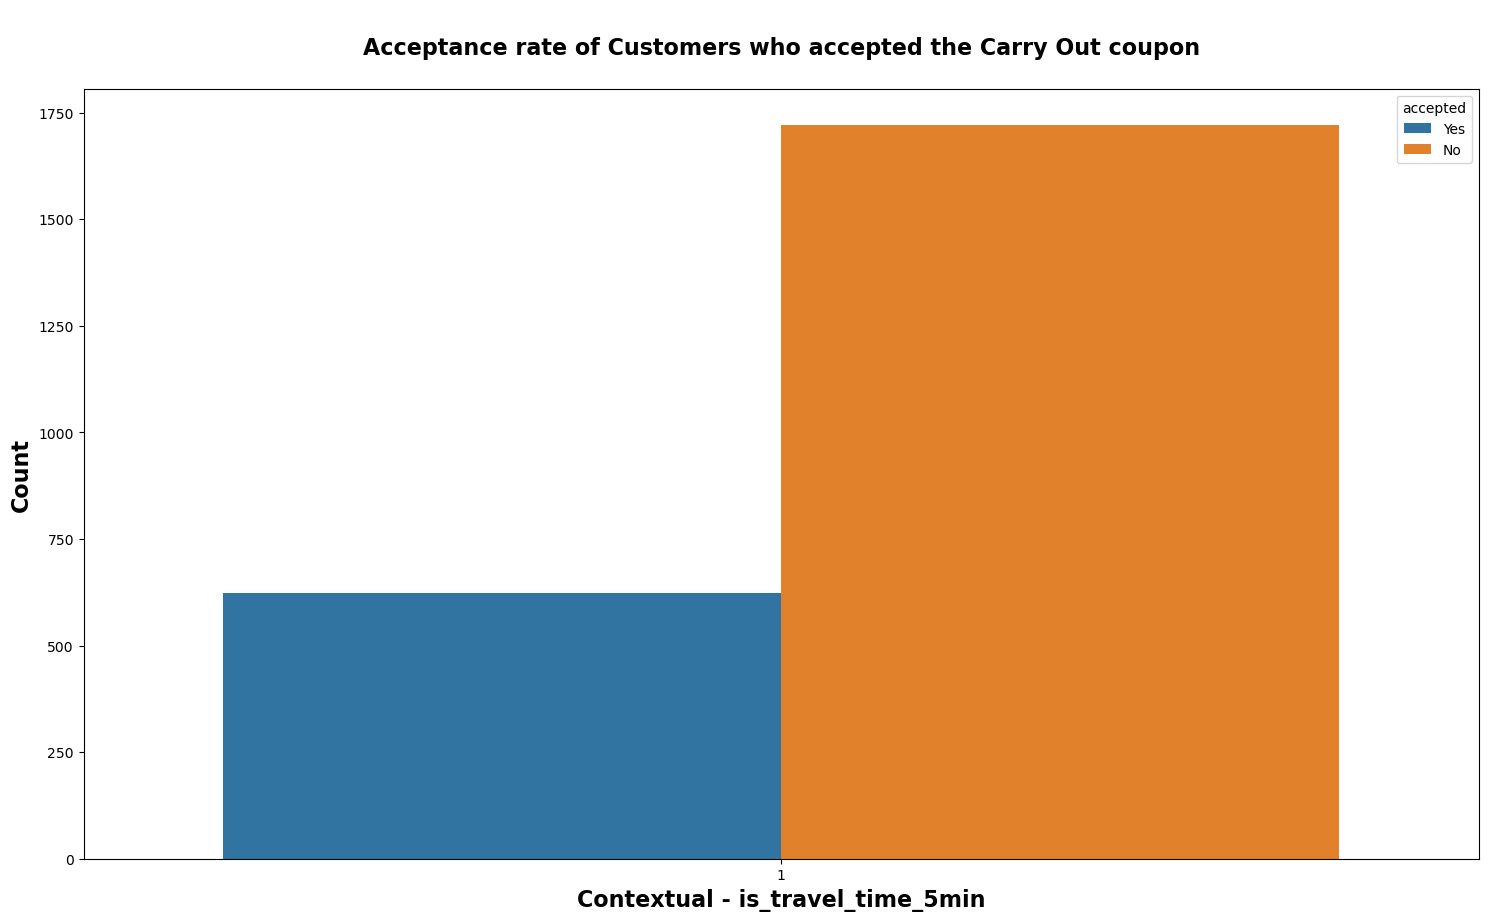

--------------------------------------------------------------------------------

is_travel_time_15min

   is_travel_time_15min accepted  count
0                     0      Yes    216
1                     0       No    656
2                     1      Yes    408
3                     1       No   1064


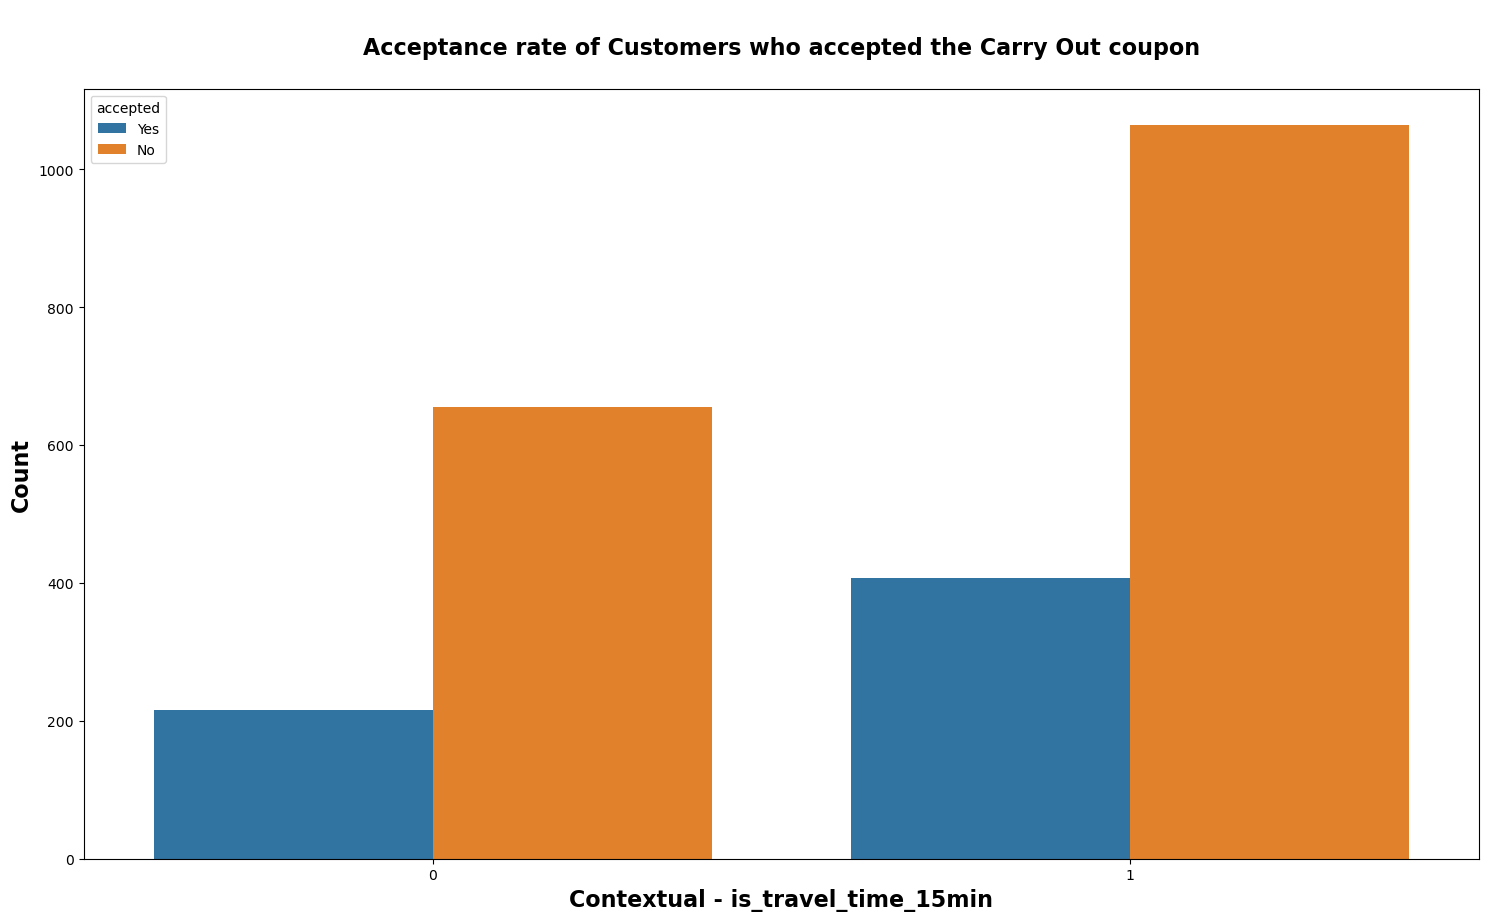

--------------------------------------------------------------------------------

is_travel_time_25min

   is_travel_time_25min accepted  count
0                     0      Yes    562
1                     0       No   1560
2                     1      Yes     62
3                     1       No    160


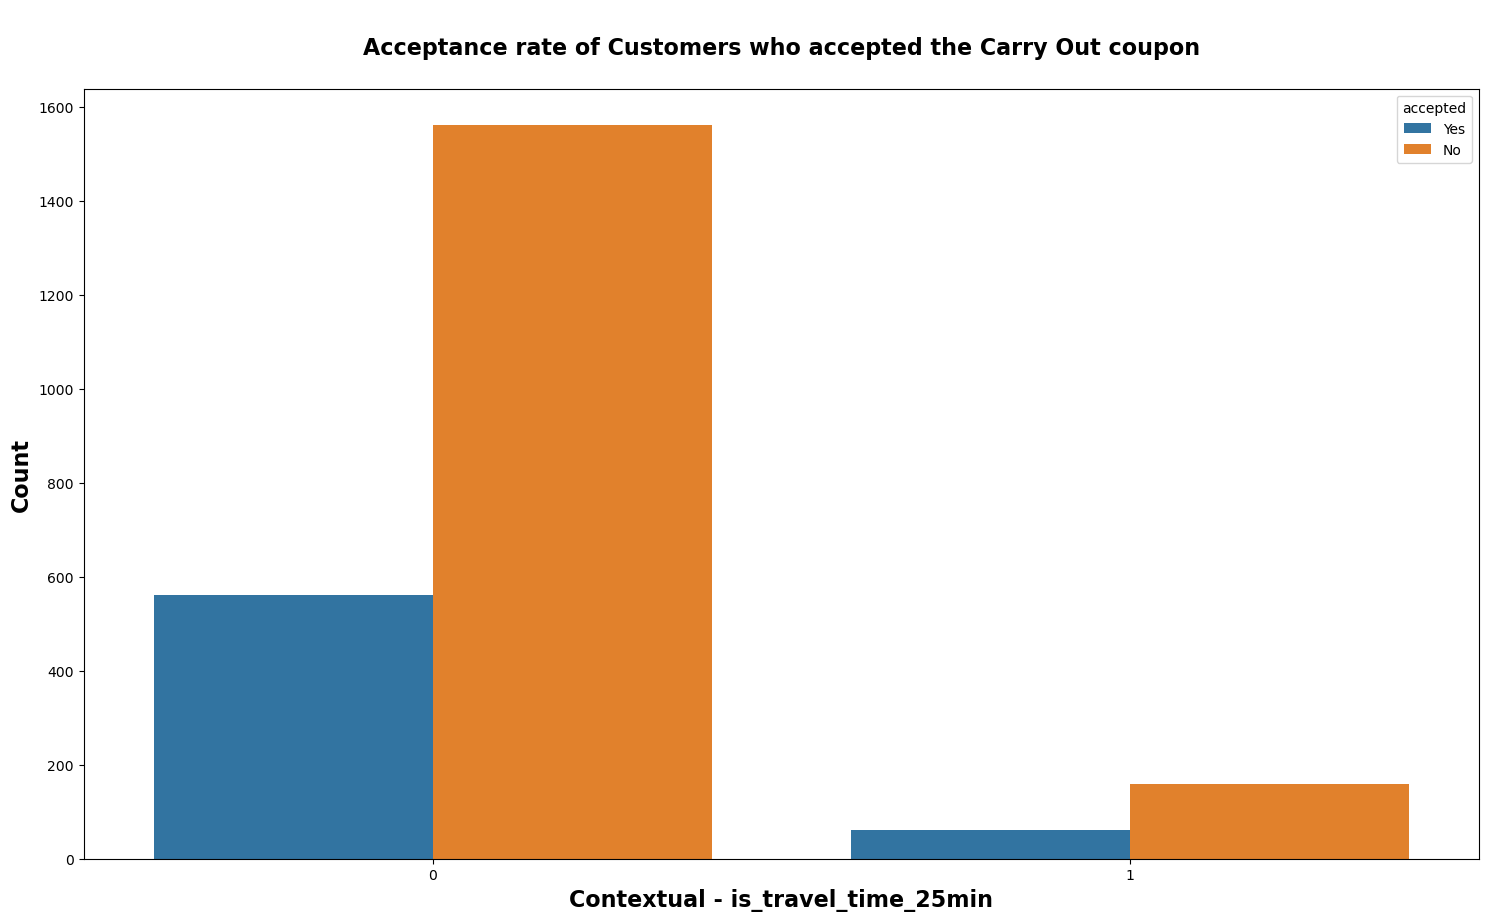

--------------------------------------------------------------------------------

is_same_direction

   is_same_direction accepted  count
0                  0      Yes    389
1                  0       No   1163
2                  1      Yes    235
3                  1       No    557


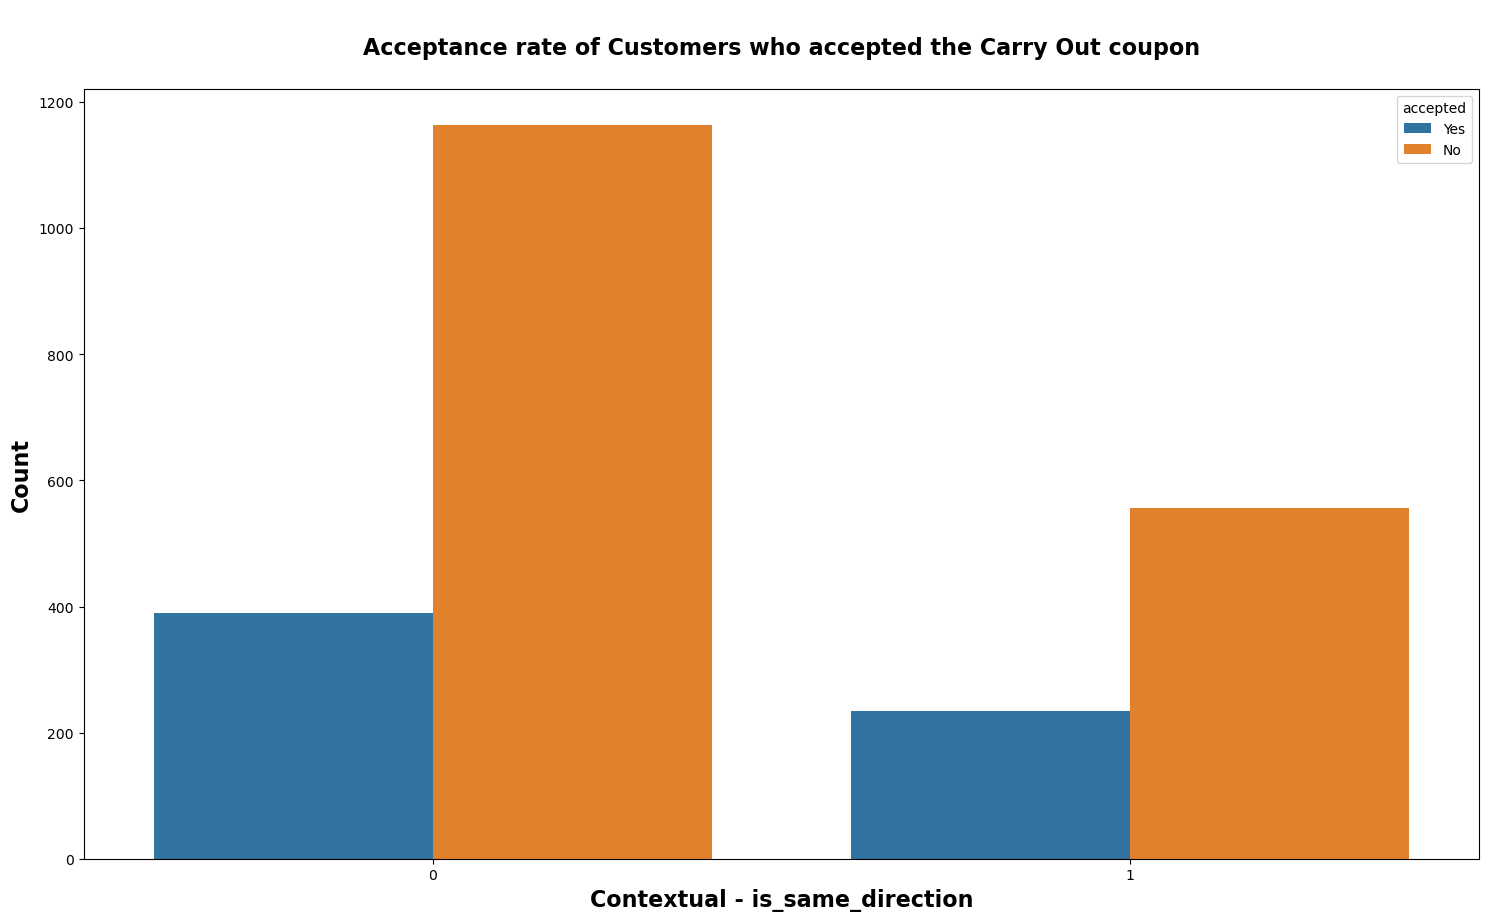

--------------------------------------------------------------------------------

is_opposite_direction

   is_opposite_direction accepted  count
0                      0      Yes    235
1                      0       No    557
2                      1      Yes    389
3                      1       No   1163


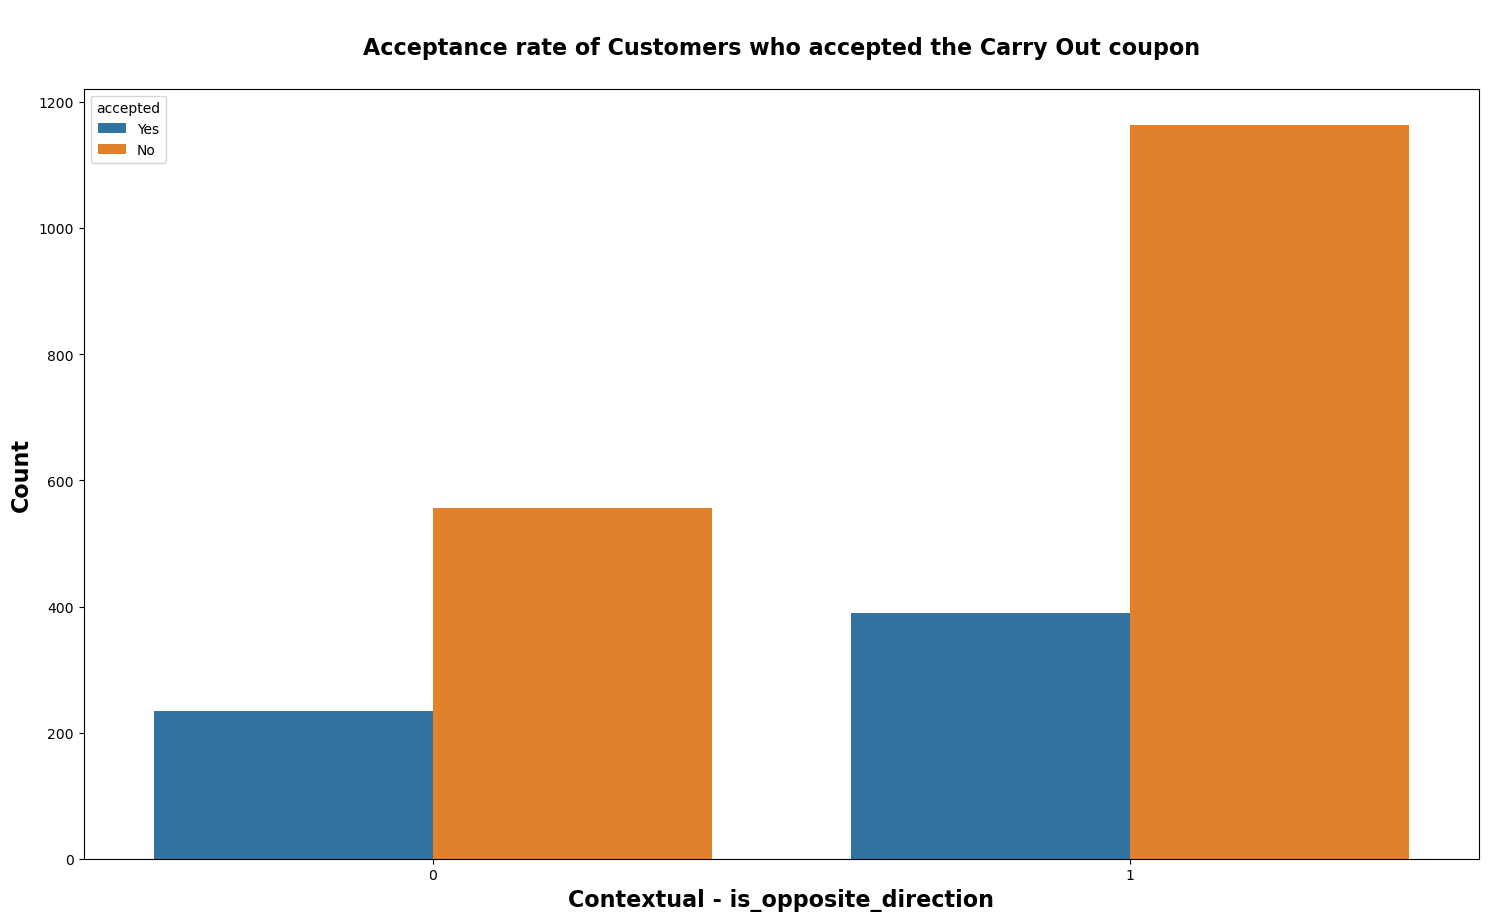

In [193]:
columns_attribute = ["destination", "age", "passenger", "weather", "temperature", 
                     "gender", "marital_status", "has_children", "education", 
                     "occupation", "income", "coffee_house", "restaurant_under_20", 
                     "restaurant_20_to_50", "is_travel_time_5min", 
                     "is_travel_time_15min", 'is_travel_time_25min', "is_same_direction", 
                     "is_opposite_direction"]

for column in columns_attribute:
    print("-" * 80)
    print(f"\n\033[1m{column}\n\033[0m")
    carry_out_acceptance_df = carry_out_df.groupby([column, 'has_coupon_accepted'])['has_coupon_accepted'].count().reset_index(name='count')

    # Create the bar plot to visualize the 'coupon' column 
    # with 'has_coupon_accepted' column using seaborn
    carry_out_acceptance_df['has_coupon_accepted'] = coupon_acceptance['has_coupon_accepted'].map({0: 'No', 1: 'Yes'})
    carry_out_acceptance_df.rename(columns = {
        'has_coupon_accepted': 'accepted'
    }, inplace=True)
    print(carry_out_acceptance_df)

    plt.figure(figsize=(18, 10)) 
    sns.barplot(x=column, y='count', hue='accepted', data=carry_out_acceptance_df)
    plt.xlabel(f'Contextual - {column}', fontweight='bold', fontsize=16)    
    plt.ylabel('Count', fontweight='bold', fontsize=16)
    plt.title('\nAcceptance rate of Customers who accepted the Carry Out coupon\n', fontweight='bold', fontsize=16)
    if (column == "occupation") or (column == "education") :
        plt.xticks(rotation=45, ha='right', wrap=True)
    plt.savefig(f'images/coupons/carry_away/carry_away_coupon_type_distribution_{column}.png')
    plt.show()
#    print("-" * 80)



**Observation**

Based on the bar plots generated for various attributes, here's a hypothesis about the characteristics of drivers more likely to accept "Carry out & Take away" coupons:
*   Young or unemployed/student
*   Traveling with a partner or friends
*   Young or unemployed/student
*   Traveling with a partner or friends
*   Heading home or having no urgent destination
*   Going out in sunny weather or at a comfortable temperature
*   Having more time to travel to their destination
*   A few occupation categories like Unemployed, Healthcare Support, Building & Grounds show slightly higher acceptance rates. However, the occupation category generally doesn't show a consistent trend with acceptance.
*   Educational attainment seems to have little or no influence on acceptance rates.


